In [3]:
# book: see https://www.safaribooksonline.com/library/view/python-for-finance/9781492024323/ch01.html
# https://pandas.pydata.org/pandas-docs/stable/10min.html
# https://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html
# ML algos compared lm() randomForest()
#https://www.analyticsvidhya.com/blog/2015/09/full-cheatsheet-machine-learning-algorithms/

# IMPORTANT
# Watch out: `pd.read_csv` use `parse_dates` and `index_col`, and verify that index is of DateTimeIndex type
# watch out, if x is a dataframe pd.DataFrame(), then:
# y = x in python does not create a new copy, but binds it (still pointing to x in memory)
# watch out, here tt is not a copy of d_tmp, but just a binding, so at the end d_tmp will be modified too!
# to create a copy use y = x.copy()
#https://stackoverflow.com/questions/39392639/copying-and-modifying-a-dataframe-pandas?rq=1

# resampling daily to quarterly returns
# https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781787123137/15/ch15lvl1sec128/resampling-data-from-daily-to-monthly-returns

# syntax comparison
# https://pandas.pydata.org/pandas-docs/version/0.23.0/comparison_with_r.html
# https://github.com/sahilseth/RvsPython
# https://cheatsheets.quantecon.org/stats-cheatsheet.html

# rolling functions see
# https://pandas.pydata.org/pandas-docs/stable/computation.html

# The preferred way of wrapping long lines is by using Python's implied line continuation inside parentheses, brackets and braces. Long lines can be broken over multiple lines by wrapping expressions in parentheses. These should be used in preference to using a backslash for line continuation.
#
# https://lectures.quantecon.org/py/ols.html

# helpful tricks
# https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba
#
# to upgrade a package
# in anaconda prompt
# conda list
# conda install scikit-learn=0.20.3

# alt - enter (run and insert empty cell below)

# for later:
# autologging decorator python

# good jupyter notebook intro (e.g. what to do for sharing a notebook, get cell output in order In [i]:)
# https://www.dataquest.io/blog/jupyter-notebook-tutorial/

# open questions
# how to create list with missing values? so far: [-1, None, 3, 2]
# example for dict with missinng data is mck 216
# here Wes converts dict to pd.Series and then many functions (which would fail on the NA (null) value in dict, do work)

# Python (version ≥3.6) for R Users: Fundamentals
# nuhttp://www.stat.cmu.edu/~hseltman/601/Python%20for%20R%20Users%20Part%201.pdf

# another move from R to Python
# https://www.datisticsblog.com/2018/08/r2py_pandas/

# WATCH OUT: search for 'watch out:' describing false friends and important differences between R and Python

# Aurelien Geron has some good intro notebooks for NumPy and Pandas
# and he recommends
# http://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html


# '_xsrf' argument missing from POST" simply open another notebook in same kernel, then error goes away
# https://github.com/nteract/hydrogen/issues/922

In [1]:
from sklearn.preprocessing import OrdinalEncoder

In [2]:
import sys
import os
print(os.getcwd()) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

import sklearn

print(sklearn.__version__)
print(pd.__version__)
print(sys.version)
# Display floats with 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

C:\Users\clehmann.LON530L\Documents\Python Scripts\Jupyter Notebooks
0.20.3
0.23.4
3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]


In [ ]:
t1_start = time.perf_counter()  
print('hi')
# Stop the stopwatch / counter 
t1_stop = time.perf_counter()   
print("Elapsed time:", t1_stop - t1_start) 

In [3]:
x=np.array([-1, 0, 3, 3])
y=np.array([10, -3, 1, 3])
yx=pd.DataFrame({'y':y, 'x':x});yx

,y,x
0,10,-1
1,-3,0
2,1,3
3,3,3


In [4]:
keys = ['a', 'b', 'c']
vals = [1, 2, 3]
zipped = dict(zip(keys, vals))
#The zip() inbuilt function takes a number of iterable objects and returns a list of tuples. 
#Each tuple groups the elements of the input objects by their positional index.
#You can also ‘unzip’ objects by calling *zip() on them.
print(zipped)

{'a': 1, 'b': 2, 'c': 3}


In [5]:
list(zip(keys, vals)) # list of tuples, above we add dict() around to convert into dict

[('a', 1), ('b', 2), ('c', 3)]

In [182]:
dict(list(zip(keys, vals)))

{'a': 1, 'b': 2, 'c': 3}

In [183]:
# or similar to R's cbind (or data.frame.cbind() if we have mixed types)
x=np.array([-1, 0, 3, 3])
y=np.array([10, -3, 1, 3])
pd.DataFrame(list(zip(x, y)))

,0,1
0,-1,10
1,0,-3
2,3,1
3,3,3


In [16]:
# McKinney p 61
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Schilling', 'Curt')]
print(pitchers)

[('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Schilling', 'Curt')]


In [22]:
len(pitchers)

3

In [21]:
type(pitchers)

list

mck: zip can be applied in a clever way to unzip the sequence. Another way to think about is converting a list of rows into a list of columns (the syntax looks a bit magical):

In [23]:
first_names, last_names = zip(*pitchers)

In [24]:
first_names

('Nolan', 'Roger', 'Schilling')

In [25]:
last_names

('Ryan', 'Clemens', 'Curt')

In [29]:
print(*pitchers)

('Nolan', 'Ryan') ('Roger', 'Clemens') ('Schilling', 'Curt')


McK p 54 unpacking tuples

In [198]:
values = 1, 2, 3, 4 # or (1, 2, 3, 4)

In [199]:
type(values)

tuple

In [200]:
first, *rest = values

In [201]:
first, rest

(1, [2, 3, 4])

In [205]:
first, *l, last = [1,2,3,4] # since [1, 2, 3, 5] it's probably first converted into a tuple

In [206]:
l # mck: *l is also used in function signatures to capture an aribitrarily long list of positional aruguments (see below *args)

[2, 3]

In [207]:
type(l)

list

In [40]:
first, last # shown as tuple

(1, 4)

In [39]:
a = first, last
type(a)

tuple

In [36]:
l

[2, 3]

In [218]:
# sorting a list
a = [3, -1, 4]

In [219]:
a.sort()

In [220]:
a

[-1, 3, 4]

In [236]:
# why does sorting fail with np.nan in the list
a_with_nan = [3, None, -1, 4]

In [238]:
a_with_nan

[3, None, -1, 4]

In [231]:
np.isnan(np.nan)

True

In [237]:
None in a_with_nan

True

In [240]:
a_with_nan.sort()

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [243]:
sorted(a_with_nan, key=lambda x: (x is None, x))
# stackoverflow
#This constructs a tuple for each element in the list, if the value is None the tuple with be (True, None), 
# if the value is anything else it will be (False, x) (where x is the value). Since tuples are sorted item by 
# item, this means that all non-None elements will come first (since False < True), and then be sorted by value.

[-1, 3, 4, None]

In [244]:
# example for dict with missinng data is mck 216
# here Wes converts dict to pd.Series and then many functions (which would fail on the NA (null) value in dict, do work)
data = {'Dave': 'dave@gmail.com', 'Wes': np.nan, 'Danny': 'danny@yahoo.com'}

In [245]:
data

{'Dave': 'dave@gmail.com', 'Wes': nan, 'Danny': 'danny@yahoo.com'}

In [49]:
b = ['saw', 'crazy', 'sunny', 'bo']
b.sort(key=len)
b

['bo', 'saw', 'crazy', 'sunny']

In [55]:
dict(zip(range(3), reversed(range(3)))) # only zip(range(3), reversed(range(3))) gives a zip object... we need dict()

{0: 2, 1: 1, 2: 0}

In [58]:
my_list = ['foo', 'bar', 'baz']
dict(zip(my_list, range(len(my_list))))

{'foo': 0, 'bar': 1, 'baz': 2}

In [60]:
mapping = {}
for i, v in enumerate(my_list):
    mapping[v] = i

In [61]:
mapping

{'foo': 0, 'bar': 1, 'baz': 2}

In [71]:
sorted(mapping)

['bar', 'baz', 'foo']

In [65]:
some_dict = {'a':1, 'a':2, 'b': -1}
some_dict # watch out: can't have non-unique keys

{'a': 2, 'b': -1}

In [66]:
some_dict = {'a':[1, 2], 'b': -1}
some_dict

{'a': [1, 2], 'b': -1}

In [67]:
# McK p 64 use defaultdict
from collections import defaultdict
words = ['apple', 'bat', 'bar', 'atom', 'book']
# categorize by first letter
by_letter = defaultdict(list)
for word in words:
    by_letter[word[0]].append(word)

In [68]:
by_letter

defaultdict(list, {'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']})

In [78]:
from collections import defaultdict
city_list = [('TX','Austin'), ('TX','Houston'), ('NY','Albany'), ('NY', 'Syracuse'), 
             ('NY', 'Buffalo'), ('NY', 'Rochester'), ('TX', 'Dallas'), ('CA','Sacramento'), 
             ('CA', 'Palo Alto'), ('GA', 'Atlanta')]
city_by_state = defaultdict(list)
for state, city in city_list:
    city_by_state[state].append(city)

In [79]:
city_by_state

defaultdict(list,
            {'TX': ['Austin', 'Houston', 'Dallas'],
             'NY': ['Albany', 'Syracuse', 'Buffalo', 'Rochester'],
             'CA': ['Sacramento', 'Palo Alto'],
             'GA': ['Atlanta']})

In [87]:
print(city_by_state)
print('print pretty:')
for state, cities in city_by_state.items():
    print(state, ', '.join(cities))

defaultdict(<class 'list'>, {'TX': ['Austin', 'Houston', 'Dallas'], 'NY': ['Albany', 'Syracuse', 'Buffalo', 'Rochester'], 'CA': ['Sacramento', 'Palo Alto'], 'GA': ['Atlanta']})
print pretty:
TX Austin, Houston, Dallas
NY Albany, Syracuse, Buffalo, Rochester
CA Sacramento, Palo Alto
GA Atlanta


In [1]:
# list extend vs append
# extend() is like adding lists, but much faster mck 56 209
genres = ['animation|children\'s|Comedy', 'Comedy|Romance']
all_genres = []
for x in genres:
    all_genres.extend(x.split('|'))

In [2]:
all_genres

['animation', "children's", 'Comedy', 'Comedy', 'Romance']

In [10]:
pd.unique(all_genres) # not all_genres.unqiue() does not exist

array(['animation', "children's", 'Comedy', 'Romance'], dtype=object)

In [11]:
set(all_genres) # remember set are like keys in dict (so must be unique)

{'Comedy', 'Romance', 'animation', "children's"}

In [250]:
# above is an example of passing a list (or tuple) to the join method onn the string ','
words = ['apple', 'bat', 'bar', 'atom', 'book']
'; '.join(words) # in R paste(words, sep = '; ')

'apple; bat; bar; atom; book'

In [90]:
string_list = ['a', 'as', 'bat', 'car', 'dove', 'python']

In [93]:
[len(string) for string in string_list]
# in R easier as most functions are vectorized
# > nchar(string_list)
# [1] 1 2 3 3 4 6
#
# or using lapply
# > unlist(lapply(string_list, nchar))
# [1] 1 2 3 3 4 6

[1, 2, 3, 3, 4, 6]

In [98]:
list(map(len, string_list))
# this is somewhat similar to R (but lapply gives immediate results, whereas map needs to be put into a 'factory function' (like list() ))
# > unlist(lapply(string_list, nchar))
# [1] 1 2 3 3 4 6

[1, 2, 3, 3, 4, 6]

In [101]:
set(map(len, string_list)) # compare with above list(map(len, string_list)) or below {len(string) for string in string_list}

{1, 2, 3, 4, 6}

In [94]:
{len(string) for string in string_list}

{1, 2, 3, 4, 6}

In [102]:
# functions as objects McK p 72
states = ['Alabama', 'Georgia!', 'Georgia', 'georgia', 'FlorIda', 
         'south carolina##', 'West virginia?']

In [103]:
import re # regular expressions, e.g. re.sub (R: gsub(pattern, replacement, x))

In [127]:
def clean_strings(strings):
    result = []
    for string in strings:
        string = string.strip()
        string = re.sub('[!#?]', '', string) # there is a whole chapter about regex in mck
        string = string.title()
        result.append(string)
    return result

In [128]:
clean_strings(states)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South Carolina',
 'West Virginia']

In [116]:
# this does not make sense as in clean_strings we loop over all elments in the list 'states'...
# no need to loop here with map again
result = map(clean_strings, states) # remember: map(fun, iter)
print(list(result))

[['A', 'L', 'A', 'B', 'A', 'M', 'A'], ['G', 'E', 'O', 'R', 'G', 'I', 'A', ''], ['G', 'E', 'O', 'R', 'G', 'I', 'A'], ['G', 'E', 'O', 'R', 'G', 'I', 'A'], ['F', 'L', 'O', 'R', 'I', 'D', 'A'], ['S', 'O', 'U', 'T', 'H', '', 'C', 'A', 'R', 'O', 'L', 'I', 'N', 'A', '', ''], ['W', 'E', 'S', 'T', '', 'V', 'I', 'R', 'G', 'I', 'N', 'I', 'A', '']]


In [142]:
# clean_string (one), not strings (not looping over strings in a list)
def clean_string(value):
    string = value.strip()
    string = re.sub('[!#?]', '', value)
    string = value.title()
    return value

In [143]:
list(map(clean_string, states)) # in R we would use lapply
# > states = c('Alabama', 'Georgia!', 'Georgia', 'georgia', 'FlorIda', 
# +           'south carolina##', 'West virginia?')
# > my_gsub <- function(x) { return(gsub(pattern='#', '', x))}
# > unlist(lapply(states, my_gsub))
# [1] "Alabama"        "Georgia!"       "Georgia"        "georgia"        "FlorIda"       
# [6] "south carolina" "West virginia?"

['Alabama',
 'Georgia!',
 'Georgia',
 'georgia',
 'FlorIda',
 'south carolina##',
 'West virginia?']

In [130]:
for x in map(clean_string, states):
    print(x)

Alabama
Georgia
Georgia
Georgia
Florida
South Carolina
West Virginia


In [118]:
def remove_punctuation(string):
    return re.sub('[!#?]', '', string)

In [119]:
for x in map(remove_punctuation, states):
    print(x)

Alabama
Georgia
Georgia
georgia
FlorIda
south carolina
West virginia


In [124]:
list(map(remove_punctuation, states))

['Alabama',
 'Georgia',
 'Georgia',
 'georgia',
 'FlorIda',
 'south carolina',
 'West virginia']

In [146]:
str.split('vs#cv', '#')

['vs', 'cv']

In [147]:
# or use 
'vs#cv'.split('#')

['vs', 'cv']

In [139]:
type('   asdf')

str

In [140]:
str.strip

<method 'strip' of 'str' objects>

In [141]:
str.strip('   asdf')

'asdf'

In [151]:
# this is really cool mck p 72 again: make a list of operations you want to apply to a list of strings

# str.strip IS FCT NAME OF THE METHOD OF STRING OBJECTS (ABOVE WE USED value.strip())
clean_ops = [str.strip, remove_punctuation, str.title]

In [148]:
def clean_strings(strings, clean_ops):
    result = []
    for string in strings:
        for fct in clean_ops:
            string = fct(string)
        result.append(string)
    return result

In [152]:
clean_strings(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South Carolina',
 'West Virginia']

In [153]:
# McK p 74 example with set(), a set can be thought of being like dicts, but keys only (and since keys must be unique, 
# duplicates are removed)
set([2, 2, 1, 3, 3])

{1, 2, 3}

In [154]:
list('aaa')

['a', 'a', 'a']

In [155]:
set(list('aaa')) # keeps only unique (distinct) letters in a string

{'a'}

In [158]:
# so to sort a collection of strings by the number of distinct letters in each string
some_strings = ['aaa', 'foo', 'abab', 'bar', 'card']
some_strings.sort(key=lambda x: len(set(list(x))))
some_strings

['aaa', 'foo', 'abab', 'bar', 'card']

In [6]:
# python tricks: Function argument unpacking
def myfunc(x, y, z):
    print(x, y, z)

tuple_vec = (1, 0, 1)
dict_vec = {'x': 1, 'y': 0, 'z': 1}

In [7]:
# unpack tuples mck 53
a, b, c = tuple_vec

In [8]:
myfunc(*tuple_vec) # here the tuple_vec is exploded into x, y, z: "unpacking"

1 0 1


In [9]:
myfunc(**dict_vec) # dict_vec is kwargs (keyword args, which turn to be dict)

1 0 1


In [10]:
list([*dict_vec]) # gives back the keys only, that's why if by mistake we call kwargs with only one * we get keys only (not shown here)

['x', 'y', 'z']

In [176]:
# good: http://hangar.runway7.net/python/packing-unpacking-arguments
# packing and unpacking
def func1(x, y, z):
    print(x) # watch out python 2 was print x, which was replaced with print(x) in python 3
    print(y)
    print(z)                

def func2(*args):
    # Convert args tuple to a list so we can modify it
    args = list(args)
    args[0] = 'Hello'
    args[1] = 'awesome'
    func1(*args) # here we unpack args into x, y, z

func2('Goodbye', 'cruel', 'world!') # whereas here we pack the three arguments into one single variable, a tuple called args
# Will print
# > Hello
# > awesome
# > world!

Hello
awesome
world!


In [177]:
5/2 # can you believe this gave 2 in python 2?

2.5

# Markdown

In [178]:
# This is a level 1 heading
## This is a level 2 heading

# This is a level 1 heading
## This is a level 2 heading

In [269]:
# like in R, functions do have access to variables declared outside the function
a = [-3]
def func():
    for i in range(5):
        a.append(i)
        
    #print(a)
    return(a)
func()
print(a)

[-3, 0, 1, 2, 3, 4]


In [293]:
def func():
    a = []
    for i in range(3):
        a.append(i)
    return(a)

func()

try:
    a # throws error
except NameError: 
    a = -1
print(a)

-1


# Generators

In [294]:
import itertools

In [295]:
first_letter = lambda x: x[0]

In [306]:
names = ['Alan', 'Adams', 'Wes', 'Max', 'Albert', 'Steve']
for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names))

A ['Alan', 'Adams']
W ['Wes']
M ['Max']
A ['Albert']
S ['Steve']


In [307]:
names

In [308]:
# remember
names = ['Alan', 'Adams', 'Wes', 'Max', 'Albert', 'Steve']
from collections import defaultdict
by_first_letter = defaultdict(list)
for name in names:
    by_first_letter[name[0]].append(name)
by_first_letter

defaultdict(list,
            {'A': ['Alan', 'Adams', 'Albert'],
             'W': ['Wes'],
             'M': ['Max'],
             'S': ['Steve']})

# NumPy

In [310]:
print(range(5))

range(0, 5)


In [312]:
arr = np.arange(5)

In [313]:
arr.shape

(5,)

In [314]:
arr.ndim

1

In [315]:
len(arr)

5

In [198]:
np.full((2, 3), np.nan)
# http://www.stat.cmu.edu/~hseltman/601/Python%20for%20R%20Users%20Part%203%20Numpy.pdf

array([[nan, nan, nan],
       [nan, nan, nan]])

In [319]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [320]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [327]:
arr2d[:, 2]

array([3, 6, 9])

In [328]:
arr2d[:, 2].shape

(3,)

In [334]:
# vs a 2d matrix with 3 rows and 1 col
arr2d[:, 2:]

array([[3],
       [6],
       [9]])

In [330]:
arr2d[:, 2:].shape

(3, 1)

In [333]:
# vs a 2d matrix with 3 rows and 1 col
arr2d[:, 1:2] # note how to select the 2nd col only

array([[2],
       [5],
       [8]])

Reshaping and __flattening__ arrays mck 452 

In [29]:
arr = np.arange(8)

In [30]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [31]:
arr.reshape(4, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

one of the passed shape can be -1, dim then will be inferred from data (simlar to R: matrix() either use nrow or ncol)

In [32]:
arr.reshape(4, -1)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

note that by default NumPy arrays are created in __row major order (like C), whereas in R it's column major order (like Fortran)__

In [33]:
arr.ravel() # or flatten() which alwyays returns a copy

array([0, 1, 2, 3, 4, 5, 6, 7])

In [38]:
# we can force to column major using F (for Fortran, watch out, C is for C-language, i.e. row major)
arr = np.arange(8).reshape(4, -1)
print(arr)
arr.ravel('F')

[[0 1]
 [2 3]
 [4 5]
 [6 7]]


array([0, 2, 4, 6, 1, 3, 5, 7])

In [50]:
# R: rep()
# > rep(c(1, 2, 3), 4)
#  [1] 1 2 3 1 2 3 1 2 3 1 2 3
arr = np.arange(3)
print(arr)
list(arr) * 3

[0 1 2]


[0, 1, 2, 0, 1, 2, 0, 1, 2]

In [47]:
# R: rep(, each = )
# > rep(c(0, 1, 2), each = 3)
# [1] 0 0 0 1 1 1 2 2 2
arr = np.arange(3)
print(arr)
arr.repeat(3)

[0 1 2]


array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [52]:
# mck 460 we can also stack copies of arrays along an axis, like "laying down tiles"
arr

array([0, 1, 2])

In [53]:
np.tile(arr, 2) # if second argument is a scalar, tiling is made row by row! 

array([0, 1, 2, 0, 1, 2])

In [57]:
np.tile(arr, (1, 2))

array([[0, 1, 2, 0, 1, 2]])

In [54]:
np.tile(arr, (2, 1))

array([[0, 1, 2],
       [0, 1, 2]])

Concatenating arrays mck 458

In [17]:
arr = np.arange(6)

In [21]:
arr.reshape(3, 2) # default: row wise (C language style)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [22]:
arr.reshape(3, 2, order='F') # to force column wise like in R (or Fortran, use: 'F')

array([[0, 3],
       [1, 4],
       [2, 5]])

In [18]:
arr1 = arr.reshape(3, 2)

In [16]:
arr2 = np.random.randn(3, 2)

In [17]:
# R: rbind 
np.r_[arr1, arr2] # not r_()

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [ 0.63524683,  0.42161767],
       [-0.4622201 , -0.7372668 ],
       [-0.88855677, -0.69994876]])

In [19]:
np.c_[np.r_[arr1, arr2], arr]

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [ 0.63524683,  0.42161767,  3.        ],
       [-0.4622201 , -0.7372668 ,  4.        ],
       [-0.88855677, -0.69994876,  5.        ]])

In [22]:
arr_rbound = np.concatenate([arr1, arr2], axis=0)

In [23]:
arr_rbound

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [ 0.63524683,  0.42161767],
       [-0.4622201 , -0.7372668 ],
       [-0.88855677, -0.69994876]])

In [61]:
arr

array([0, 1, 2, 3, 4, 5])

In [27]:
arr.shape

(6,)

In [63]:
arr.reshape(6, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

this is __useful__ to convert from a vector of type (6,) to be of shape (6, 1), especially for __broadcasting__ with higher dim arrays

In [62]:
arr[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [64]:
arr[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5]])

In [26]:
# or use np.concatenate, but see here: to cbind arr, we need to resphae from (6, :) to (6, 1) which was not required using c_[]
np.concatenate([arr_rbound, arr.reshape(6, 1)], axis=1)

array([[ 0.        ,  1.        ,  0.        ],
       [ 2.        ,  3.        ,  1.        ],
       [ 4.        ,  5.        ,  2.        ],
       [ 0.63524683,  0.42161767,  3.        ],
       [-0.4622201 , -0.7372668 ,  4.        ],
       [-0.88855677, -0.69994876,  5.        ]])

In [ ]:
# mck 458 concat arrays

In [5]:
# mck p 111 and 465
arr = np.random.randn(5, 4)

In [6]:
arr

array([[-0.8093023 ,  0.60956797, -1.40916053, -0.17401044],
       [ 0.61623741, -1.43866593,  0.21172439,  0.64963336],
       [ 1.53979553, -0.34692741, -2.30151986,  0.06857117],
       [-0.45582667, -0.2935474 ,  0.87126542, -2.00458235],
       [-1.47310001,  1.01068876,  2.63842985,  0.56036418]])

In [10]:
arr.mean() # without axis, it calcs function about the entire array

-0.0965182430371428

In [11]:
arr.mean(0) # calc function along axis 0, i.e. "compute down the rows"

array([-0.11643921, -0.0917768 ,  0.00214785, -0.18000482])

In [12]:
arr.mean(1) # calc function along axis 1, i.e. "compute across the columns"

array([-0.44572633,  0.00973231, -0.26002014, -0.47067275,  0.6840957 ])

In [335]:
# Boolean indexing (similar to R) mck 99
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [336]:
data = np.random.randn(7, 4)

In [337]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [338]:
data

array([[ 0.22156115,  0.4842274 ,  0.23633171,  0.32474218],
       [ 0.59268844, -0.64733533, -0.10709379, -0.64793824],
       [-0.88097418,  0.11395727, -0.58979128, -1.3193746 ],
       [-0.52435653, -0.10848907,  0.16665207,  0.3197014 ],
       [ 2.56940761,  0.14582881, -1.01000843,  0.66809608],
       [-1.6844883 ,  0.78521157,  0.41427153,  0.67871165],
       [-0.48417247, -0.03682499,  1.83756007,  0.51136219]])

In [340]:
data[names == 'Bob']

array([[ 0.22156115,  0.4842274 ,  0.23633171,  0.32474218],
       [-0.52435653, -0.10848907,  0.16665207,  0.3197014 ]])

In [341]:
np.where(names == 'Bob') # R: which(names == 'Bob')

(array([0, 3], dtype=int64),)

In [343]:
data[np.where(names == 'Bob'), :]

array([[[ 0.22156115,  0.4842274 ,  0.23633171,  0.32474218],
        [-0.52435653, -0.10848907,  0.16665207,  0.3197014 ]]])

In [346]:
# to negate
data[np.where(names != 'Bob'), :]

array([[[ 0.59268844, -0.64733533, -0.10709379, -0.64793824],
        [-0.88097418,  0.11395727, -0.58979128, -1.3193746 ],
        [ 2.56940761,  0.14582881, -1.01000843,  0.66809608],
        [-1.6844883 ,  0.78521157,  0.41427153,  0.67871165],
        [-0.48417247, -0.03682499,  1.83756007,  0.51136219]]])

In [347]:
# or use ~
data[np.where(~(names == 'Bob')), :]

array([[[ 0.59268844, -0.64733533, -0.10709379, -0.64793824],
        [-0.88097418,  0.11395727, -0.58979128, -1.3193746 ],
        [ 2.56940761,  0.14582881, -1.01000843,  0.66809608],
        [-1.6844883 ,  0.78521157,  0.41427153,  0.67871165],
        [-0.48417247, -0.03682499,  1.83756007,  0.51136219]]])

In [ ]:
# in R
# > arr2d[names == 'Bob', ]
#            [,1]        [,2]       [,3]       [,4]
# [1,] 0.01728541 -0.47237815 -0.2824668  0.1844521
# [2,] 0.32658129 -0.09702417 -2.2754217 -0.3828109

Watch out, indexing a 2d numpy array with a scalar gives the row, whereas in R matrix (or array()) it gives the cell of the flattened matrix.
Read https://rstudio.github.io/reticulate/articles/arrays.html for details!

In [345]:
# > arr2d
#             [,1]         [,2]        [,3]       [,4]
# [1,]  0.01728541 -0.472378147 -0.28246676  0.1844521
# [2,] -0.14201114 -0.003745342  0.10851272 -0.1257515
# [3,] -1.62275068  1.246749208 -0.36581098  1.1571777
# [4,]  0.32658129 -0.097024172 -2.27542169 -0.3828109
# [5,]  1.28339811 -0.138931695 -0.06624049  0.4040623
# [6,]  1.13097867  0.713947912 -1.32967435  0.7911558
# [7,]  0.53351194  0.997616259 -0.13153605 -1.0527742

# > arr2d[1] # <= GIVES THE CELL 1, 1
# > arr2d[8] # <= GIVES THE CELL 1, 2 (rowise counting)
# [1] -0.4723781

# [1] 0.01728541
# > arr2d[, 1]
# [1]  0.01728541 -0.14201114 -1.62275068  0.32658129  1.28339811  1.13097867  0.53351194
# > arr2d[1, ]
# [1]  0.01728541 -0.47237815 -0.28246676  0.18445209


And in a R data.frame it gives the column!

In [ ]:
# > df2d <- data.frame(arr2d)
# > df2d[1]
#            X1
# 1  0.01728541
# 2 -0.14201114
# 3 -1.62275068
# 4  0.32658129
# 5  1.2833981
# 6  1.13097867
# 7  0.53351194

In [344]:
data[0] # watch out: gives the 1st row !

array([0.22156115, 0.4842274 , 0.23633171, 0.32474218])

In [348]:
# Fancy indexing
arr = np.arange(32).reshape(8, 4)

In [349]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [350]:
arr[[4, 2, 0, 6]]

array([[16, 17, 18, 19],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [24, 25, 26, 27]])

In [352]:
arr[[4, 2, 0, 6], :] # I'll probably use this to be on the safer side...

array([[16, 17, 18, 19],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [24, 25, 26, 27]])

In [353]:
# this gives a different result than what one would expect (e.g. what R and other langugages gives)
arr[[1, 5, 7, 2],[0, 3, 1, 2]]
# basically gives elements corresponding to each tuple of indices: (1, 0), (5, 3), (7, 1), and (2, 2)

array([ 4, 23, 29, 10])

In [354]:
# to get what one would expect (also what one gets in R)
# mck 103
arr[[1, 5, 7, 2], :][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [356]:
arr2d = np.random.randn(4, 4)

In [357]:
arr2d

array([[ 0.10645694,  0.26230529, -0.49440819, -1.03118702],
       [ 0.58152526, -0.55739684,  0.65743988, -1.30951189],
       [-0.31291689,  0.00431245, -1.130743  , -0.8857634 ],
       [-0.21772447, -0.6811347 , -1.14784859, -0.59608007]])

In [358]:
np.where(arr2d > 0, True, False)

array([[ True,  True, False, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [False, False, False, False]])

In [360]:
arr2d > 0

array([[ True,  True, False, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [False, False, False, False]])

use **np.where()** as vectorized version of R's ifelse(cond, x, y) or in python: x if condition else y

In [361]:
np.where(arr2d > 0, arr2d, np.nan) # R: ifelse(arr2d > 0, arr2d, NA)

array([[0.10645694, 0.26230529,        nan,        nan],
       [0.58152526,        nan, 0.65743988,        nan],
       [       nan, 0.00431245,        nan,        nan],
       [       nan,        nan,        nan,        nan]])

In [236]:
# causalens example
search_space = {
      'a': list(range(100)),
      'b': [-1, 0, 1, 10] + list(range(11, 30)),
      'c': [-10, -5, 0, 5, 10]
}

In [25]:
ord('A')

65

In [258]:
# loop over letters
[chr(ord('A')+i) for i in range(3)]

['A', 'B', 'C']

In [265]:
import itertools
a_dict = {'a': list(range(3)), 'b': list(range(2)), 'c': [chr(ord('A')+i) for i in range(3)]}
print(a_dict)
print(list(itertools.product(*list(a_dict.values()))))

{'a': [0, 1, 2], 'b': [0, 1], 'c': ['A', 'B', 'C']}
[(0, 0, 'A'), (0, 0, 'B'), (0, 0, 'C'), (0, 1, 'A'), (0, 1, 'B'), (0, 1, 'C'), (1, 0, 'A'), (1, 0, 'B'), (1, 0, 'C'), (1, 1, 'A'), (1, 1, 'B'), (1, 1, 'C'), (2, 0, 'A'), (2, 0, 'B'), (2, 0, 'C'), (2, 1, 'A'), (2, 1, 'B'), (2, 1, 'C')]


In [281]:
# this would have been a solution for the causalens gridsearch question
[dict(zip(a_dict, x)) for x in itertools.product(*a_dict.values())]

[{'a': 0, 'b': 0, 'c': 'A'},
 {'a': 0, 'b': 0, 'c': 'B'},
 {'a': 0, 'b': 0, 'c': 'C'},
 {'a': 0, 'b': 1, 'c': 'A'},
 {'a': 0, 'b': 1, 'c': 'B'},
 {'a': 0, 'b': 1, 'c': 'C'},
 {'a': 1, 'b': 0, 'c': 'A'},
 {'a': 1, 'b': 0, 'c': 'B'},
 {'a': 1, 'b': 0, 'c': 'C'},
 {'a': 1, 'b': 1, 'c': 'A'},
 {'a': 1, 'b': 1, 'c': 'B'},
 {'a': 1, 'b': 1, 'c': 'C'},
 {'a': 2, 'b': 0, 'c': 'A'},
 {'a': 2, 'b': 0, 'c': 'B'},
 {'a': 2, 'b': 0, 'c': 'C'},
 {'a': 2, 'b': 1, 'c': 'A'},
 {'a': 2, 'b': 1, 'c': 'B'},
 {'a': 2, 'b': 1, 'c': 'C'}]

In [283]:
# I would have used zip(a_dict.keys(), x): but seems not required, looks like when first argument to zip is dict, 
# it takes keys only anyway, mck: iterating over a dict take its keys (p75, generators)
[dict(zip(a_dict.keys(), x)) for x in itertools.product(*a_dict.values())]

[{'a': 0, 'b': 0, 'c': 'A'},
 {'a': 0, 'b': 0, 'c': 'B'},
 {'a': 0, 'b': 0, 'c': 'C'},
 {'a': 0, 'b': 1, 'c': 'A'},
 {'a': 0, 'b': 1, 'c': 'B'},
 {'a': 0, 'b': 1, 'c': 'C'},
 {'a': 1, 'b': 0, 'c': 'A'},
 {'a': 1, 'b': 0, 'c': 'B'},
 {'a': 1, 'b': 0, 'c': 'C'},
 {'a': 1, 'b': 1, 'c': 'A'},
 {'a': 1, 'b': 1, 'c': 'B'},
 {'a': 1, 'b': 1, 'c': 'C'},
 {'a': 2, 'b': 0, 'c': 'A'},
 {'a': 2, 'b': 0, 'c': 'B'},
 {'a': 2, 'b': 0, 'c': 'C'},
 {'a': 2, 'b': 1, 'c': 'A'},
 {'a': 2, 'b': 1, 'c': 'B'},
 {'a': 2, 'b': 1, 'c': 'C'}]

In [272]:
[x for x in itertools.product(*a_dict.values())]

[(0, 0, 'A'),
 (0, 0, 'B'),
 (0, 0, 'C'),
 (0, 1, 'A'),
 (0, 1, 'B'),
 (0, 1, 'C'),
 (1, 0, 'A'),
 (1, 0, 'B'),
 (1, 0, 'C'),
 (1, 1, 'A'),
 (1, 1, 'B'),
 (1, 1, 'C'),
 (2, 0, 'A'),
 (2, 0, 'B'),
 (2, 0, 'C'),
 (2, 1, 'A'),
 (2, 1, 'B'),
 (2, 1, 'C')]

In [274]:
a_dict.values()

dict_values([[0, 1, 2], [0, 1], ['A', 'B', 'C']])

In [277]:
type(a_dict.values()) # looks to me like a list of lists, therefore belwo we can use * to unpack (?)

dict_values

In [273]:
[i for i in itertools.product(*a_dict.values())]

[(0, 0, 'A'),
 (0, 0, 'B'),
 (0, 0, 'C'),
 (0, 1, 'A'),
 (0, 1, 'B'),
 (0, 1, 'C'),
 (1, 0, 'A'),
 (1, 0, 'B'),
 (1, 0, 'C'),
 (1, 1, 'A'),
 (1, 1, 'B'),
 (1, 1, 'C'),
 (2, 0, 'A'),
 (2, 0, 'B'),
 (2, 0, 'C'),
 (2, 1, 'A'),
 (2, 1, 'B'),
 (2, 1, 'C')]

## Broadcasing

In [65]:
arr = np.arange(5)

In [66]:
arr

array([0, 1, 2, 3, 4])

In [68]:
# same in R
arr * 5

array([ 0,  5, 10, 15, 20])

In [235]:
# compare with list, which does not broadcast here
list([0, 1, 2, 3, 4]) * 5

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [69]:
# demean columns (i.e. run over the rows) mck 462
arr = np.random.randn(4, 3)

In [70]:
arr

array([[-1.45877184,  0.49510723,  0.40090861],
       [-0.59027509,  2.34837276, -1.29991666],
       [-0.94824575, -0.23719765, -0.13250549],
       [-0.21150589, -0.91322441,  0.95758164]])

In [71]:
arr.mean(0) # R: colMeans()

array([-0.80219964,  0.42326448, -0.01848297])

In [72]:
demeaned_cols = arr - arr.mean(0)

In [74]:
demeaned_cols

array([[-0.6565722 ,  0.07184275,  0.41939159],
       [ 0.21192455,  1.92510828, -1.28143368],
       [-0.14604611, -0.66046213, -0.11402251],
       [ 0.59069375, -1.33648889,  0.97606461]])

In [75]:
#check
demeaned_cols.mean(0)

array([-5.55111512e-17,  0.00000000e+00,  0.00000000e+00])

In [76]:
# demean row wise is more involved, because vector of means must have shape (rows, 1)
row_means = arr.mean(1)

In [77]:
row_means

array([-0.18758533,  0.152727  , -0.4393163 , -0.05571622])

In [79]:
row_means.shape

(4,)

In [80]:
row_means.reshape(4, 1)

array([[-0.18758533],
       [ 0.152727  ],
       [-0.4393163 ],
       [-0.05571622]])

In [81]:
# this gives an error, since we tried to subtract row means of shape (4, ) instead of shape (4, 1)
demeaned_rows = arr - row_means

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [83]:
demeaned_rows = arr - row_means.reshape(4, 1)
# see below for nicer
# demeaned_rows = arr - row_means[:, np.newaxis]

In [84]:
demeaned_rows

array([[-1.2711865 ,  0.68269256,  0.58849395],
       [-0.74300209,  2.19564575, -1.45264366],
       [-0.50892946,  0.20211865,  0.30681081],
       [-0.15578967, -0.85750819,  1.01329786]])

In [86]:
# check, ok
demeaned_rows.mean(1)

array([ 0.00000000e+00,  7.40148683e-17, -1.85037171e-17,  0.00000000e+00])

__great: easier way to reshape in this particular case (without need to add number of rows) - using arr[:, np.newaxis]__

In [94]:
row_means

array([-0.18758533,  0.152727  , -0.4393163 , -0.05571622])

In [98]:
row_means.reshape(len(arr), 1) # cumbersome, easier using np.newaxis, see below

array([[-0.18758533],
       [ 0.152727  ],
       [-0.4393163 ],
       [-0.05571622]])

In [99]:
row_means[:, np.newaxis] # instead of using something like len(row_means)

array([[-0.18758533],
       [ 0.152727  ],
       [-0.4393163 ],
       [-0.05571622]])

In [100]:
demeaned_rows = arr - row_means[:, np.newaxis]

In [101]:
demeaned_rows

array([[-1.2711865 ,  0.68269256,  0.58849395],
       [-0.74300209,  2.19564575, -1.45264366],
       [-0.50892946,  0.20211865,  0.30681081],
       [-0.15578967, -0.85750819,  1.01329786]])

In [103]:
arr = np.arange(15).reshape(5, -1)

In [104]:
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [105]:
arr[::2] # every second row (since array is row major order, if we don't pass col, it takes rows)

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14]])

In [107]:
arr[::2, :] # every second row

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14]])

In [109]:
arr[:, ::2] # every second col

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11],
       [12, 14]])

Random walk example mck 119

In [111]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

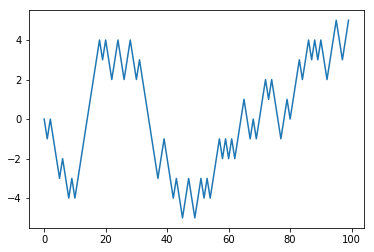

In [112]:
plt.plot(walk[:100])

watch out, there is random.randint(): Return random integer in range [a, b], including both end points, 
and np.random.randint(): np.random.randint(low, high=None, size=None, dtype='l'), Return random integers from `low` (inclusive) to `high` (exclusive).

In [118]:
# faster by just using cumsum
# watch out: np.random.randint(): np.random.randint(low, high=None, size=None, dtype='l'), 
# Return random integers from low (inclusive) to high (exclusive).
np.random.randint(0, 2, 5) 

array([1, 1, 0, 1, 0])

In [122]:
draws = np.random.randint(0, 2, steps)

In [123]:
draws[:10] > 0

array([ True,  True,  True, False, False,  True,  True,  True, False,
       False])

In [125]:
np.where(draws[:10] > 0, 1, 0)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [126]:
sum(draws[:10] > 0)

6

In [127]:
# seems we could do it the R way (just draws > 0), but let's use np.where() like mck p 120
steps = np.where(draws > 0, 1, -1)

In [131]:
walk = steps.cumsum()

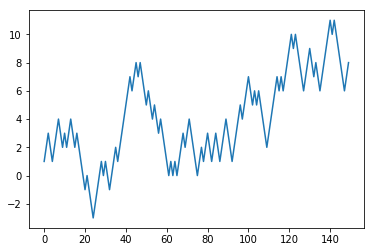

In [137]:
plt.plot(walk[:150])

In [135]:
# first crossing of 10 or -10
(np.abs(walk) > 10)[:10] # get the first True using np.argmax()

array([False, False, False, False, False, False, False, False, False,
       False])

In [136]:
(np.abs(walk) > 10).argmax() # R: which.max()

140

In [145]:
# simulate nwalks = 1000 random walks of length 1000
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size = (nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # cumsum row wise (run over columns)
walks

array([[ -1,  -2,  -3, ...,  -4,  -5,  -4],
       [  1,   2,   1, ...,  12,  13,  12],
       [  1,   0,  -1, ...,  14,  15,  16],
       ...,
       [  1,   0,   1, ...,  14,  15,  16],
       [ -1,   0,   1, ..., -20, -21, -22],
       [ -1,   0,   1, ..., -20, -19, -18]], dtype=int32)

In [146]:
walks.shape

(5000, 1000)

In [147]:
rand_rows = np.random.randint(0, nwalks, 10)
rand_rows

array([3182,  670, 3733, 2355, 1511, 2275, 4438, 4516, 1336,  581])

In [149]:
walks[rand_rows, :10]

array([[ -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10],
       [ -1,  -2,  -1,   0,   1,   0,  -1,  -2,  -3,  -2],
       [  1,   2,   3,   2,   1,   0,   1,   0,   1,   2],
       [  1,   0,  -1,   0,  -1,   0,  -1,  -2,  -3,  -2],
       [  1,   0,  -1,  -2,  -1,  -2,  -3,  -2,  -1,   0],
       [ -1,  -2,  -1,   0,   1,   0,   1,   0,   1,   2],
       [  1,   2,   1,   0,   1,   2,   1,   0,  -1,  -2],
       [  1,   2,   3,   2,   3,   4,   3,   2,   3,   2],
       [  1,   0,   1,   0,   1,   0,   1,   0,   1,   0],
       [  1,   2,   1,   0,  -1,   0,  -1,  -2,  -3,  -4]], dtype=int32)

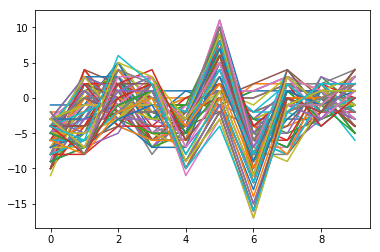

In [148]:
plt.plot(walks[rand_rows, :100])

In [151]:
# check which of the 5000 paths actually did ever cross the boundary
hits30 = (np.abs(walks) > 30).any(1) # over cols, i.e. row-wise
hits30.sum()

3261

In [154]:
walks[hits30, :].argmax(1).mean()

475.0714504753143

# Series and DataFrame

(mck 126)
"I will use the terms missinng or NA interchangeably to refer to missing data. The isnull and notnull functios in pandas should be usd to detect missing data"

In [26]:
sdata = {'a': 2, 'b': -3, 'c': 4}

In [28]:
letterss = ['b', 'c', 'd']

In [29]:
obj4 = pd.Series(sdata, index = letterss)

In [30]:
obj4

b   -3.00
c    4.00
d     nan
dtype: float64

In [424]:
pd.isnull(obj4)

b    False
c    False
d     True
dtype: bool

In [425]:
pd.notnull(obj4)

b     True
c     True
d    False
dtype: bool

In [426]:
# using the instance method
obj4.isnull()

b    False
c    False
d     True
dtype: bool

In [31]:
# mck: DataFrames cols are placed in sorted order - me: not true (any more?b)
data = {'state': ['Ohio', 'Nevada'],
       'year': [2000, 2001],
       'pop': [1.5, 1.7]}
frame = pd.DataFrame(data)

In [32]:
frame

,state,year,pop
0,Ohio,2000,1.50
1,Nevada,2001,1.70


In [33]:
print(frame)

    state  year  pop
0    Ohio  2000 1.50
1  Nevada  2001 1.70


__Index objects are immutale and thus can't be modified by the user__ (makes it safer to share Index objects among data structures) (mck 135).

Reindexing means rearranging the data acc to the new index, __introducing missing values if any index values were not already present__. It is not overwriting existing indices (for this I guess one has to define a new DataFrame).

In [466]:
frame.reindex([2, 1, 0])

,state,year,pop
2,NaN,NaN,NaN
1,Nevada,2001.0,1.7
0,Ohio,2000.0,1.5


In [456]:
# mck innterpolation of fillinng of values when reindexing; check if useful for time-series
obj2 = pd.Series(['blue', 'purble', 'red', 'green'], index = [0, 2, 4, 6])

In [457]:
obj2

0      blue
2    purble
4       red
6     green
dtype: object

In [458]:
obj2.reindex(range(6))

0      blue
1       NaN
2    purble
3       NaN
4       red
5       NaN
dtype: object

In [459]:
obj2.reindex(range(6), method = 'ffill')

0      blue
1      blue
2    purble
3    purble
4       red
5       red
dtype: object

In [34]:
# drop rows
frame

,state,year,pop
0,Ohio,2000,1.50
1,Nevada,2001,1.70


In [39]:
frame[frame.state =='Nevada'].index

Int64Index([1], dtype='int64')

In [40]:
frame.drop(frame[frame.state =='Nevada'].index)

,state,year,pop
0,Ohio,2000,1.50


In [42]:
frame[frame.state != 'Nevada'] 

,state,year,pop
0,Ohio,2000,1.50


In [43]:
frame

,state,year,pop
0,Ohio,2000,1.50
1,Nevada,2001,1.70


In [468]:
# drop columns
frame.drop(['year', 'pop'], axis=1) # one can add inplace=True

,state
0,Ohio
1,Nevada


In [470]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Nevada,2001,1.7


In [471]:
frame['state']

0      Ohio
1    Nevada
Name: state, dtype: object

In [472]:
frame.loc[:, 'state'] # same as above

0      Ohio
1    Nevada
Name: state, dtype: object

In [473]:
frame[['year', 'pop']]

,year,pop
0,2000,1.5
1,2001,1.7


In [474]:
frame.loc[:, ['year', 'pop']] # same as above

,year,pop
0,2000,1.5
1,2001,1.7


Integer Indexes (mck 145)

In [47]:
# pandas objects indexed by integers often trips up new users, due to some differences with indexinng semantics on built-in 
# Python data strutures liked lists and tuples. Eg. this gives an error
ser = pd.Series(np.arange(3.)) # btw: using np.arange(3.) gives dtype: innt
ser

0   0.00
1   1.00
2   2.00
dtype: float64

In [49]:
# ser[-1] # throws an error

In [53]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c']) # or index=list('abc')

In [52]:
ser2

a   0.00
b   1.00
c   2.00
dtype: float64

In [54]:
ser2[-1]

2.0

Important (McK): if you have an axis index containing integers, data selectionn will always be label-oriented. For more precies handling, use loc (for labels) or iloc (for integers)

In [55]:
ser[:1]

0   0.00
dtype: float64

In [56]:
ser.loc[:1] # labels: include endpoint

0   0.00
1   1.00
dtype: float64

In [57]:
ser.iloc[:1] # integers: w/o endpoint

0   0.00
dtype: float64

In [58]:
# http://www.stat.cmu.edu/~hseltman/601/Python%20for%20R%20Users%20Part%204%20Pandas.pdf
import math as math
temp = pd.DataFrame([[math.nan, 2, 3], [4, 5, 6]])
temp

,0,1,2
0,nan,2,3
1,4.00,5,6


In [59]:
temp.dropna(axis=0) # return rows with no nan’s

,0,1,2
1,4.00,5,6


In [60]:
temp.dropna() # default return rows with no nan’s

,0,1,2
1,4.00,5,6


In [204]:
temp.dropna(axis=1)

,1,2
0,2,3
1,5,6


In [207]:
temp = temp.fillna(999) # perhaps useful before an export

In [208]:
temp

,0,1,2
0,999.0,2,3
1,4.0,5,6


In [61]:
names = ["Pooya", "Ralph", "Jihae", "Ling"]
ages = [28, 31, 24, 22]
MSP = [True, False, False, True]
pd.DataFrame([names, ages, MSP]) # doesn't give what an R user would have in mind (each list a col): see using zip below

,0,1,2,3
0,Pooya,Ralph,Jihae,Ling
1,28,31,24,22
2,True,False,False,True


In [62]:
# since 
[names, ages, MSP]

[['Pooya', 'Ralph', 'Jihae', 'Ling'],
 [28, 31, 24, 22],
 [True, False, False, True]]

In [66]:
list(zip([names, ages, MSP]))

[(['Pooya', 'Ralph', 'Jihae', 'Ling'],),
 ([28, 31, 24, 22],),
 ([True, False, False, True],)]

In [71]:
dtf = pd.DataFrame(list(zip(names, ages, MSP)),columns = ["name", "age", "MSP"])

In [211]:
dtf

,name,age,MSP
0,Pooya,28,True
1,Ralph,31,False
2,Jihae,24,False
3,Ling,22,True


In [ ]:
dtf.iloc[[1,3], ['MSP', 'age']] # fails

In [214]:
dtf.columns.isin(['MSP', 'age']) # [False, True, True])

array([False,  True,  True])

In [215]:
dtf.iloc[[1,3], dtf.columns.isin(['MSP', 'age'])]

,age,MSP
1,31,False
3,22,True


In [72]:
dtf['age'] < 28

0    False
1    False
2     True
3     True
Name: age, dtype: bool

In [73]:
(dtf['age'] < 28).values

array([False, False,  True,  True])

In [217]:
# dtf.iloc[dtf['age'] < 28, 0:2] # ValueError
dtf.iloc[(dtf['age'] < 28).values, 0:2]

,name,age
2,Jihae,24
3,Ling,22


In [223]:
# keep only cols which start with a small leters
dtf.filter(regex = "^[a-z]") # add axis=0 to filter rownames

,name
0,Pooya
1,Ralph
2,Jihae
3,Ling


In [220]:
dtf.drop("MSP", axis=1) # axis=0 drops columns by index id

,name,age
0,Pooya,28
1,Ralph,31
2,Jihae,24
3,Ling,22


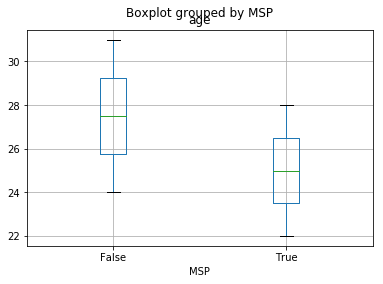

In [224]:
dtf.boxplot('age', by='MSP')

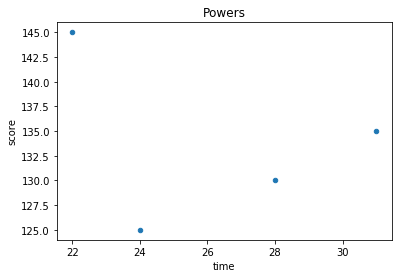

In [226]:
dtf['weight'] = [130, 135, 125, 145]
dtf.plot.scatter('age', 'weight')
plt.ylabel('score')
plt.xlabel('time')
plt.title("Powers")
plt.show()
# plt.savefig("power.png")
plt.close() # optional

In [227]:
wide = pd.DataFrame([["A", 3, 4, 5],
 ["B", 6, 7, 8],
 ["C", 9, 10, 11]],
 columns=["id","v1","v2","v3"])

In [228]:
wide

,id,v1,v2,v3
0,A,3,4,5
1,B,6,7,8
2,C,9,10,11


In [229]:
tall = pd.melt(wide, 'id')

In [230]:
tall

,id,variable,value
0,A,v1,3
1,B,v1,6
2,C,v1,9
3,A,v2,4
4,B,v2,7
5,C,v2,10
6,A,v3,5
7,B,v3,8
8,C,v3,11


In [231]:
tall.pivot('id', 'variable', 'value')

variable,v1,v2,v3
id,,,
A,3,4,5
B,6,7,8
C,9,10,11


In [285]:
tall.pivot('id', 'variable', 'value').reset_index()

variable,id,v1,v2,v3
0,A,3,4,5
1,B,6,7,8
2,C,9,10,11


In [296]:
str(np.arange(4))

'[0 1 2 3]'

In [301]:
dtf['rx'] = [str(i) for i in [1, 2, 3, 1]] # cannot like in R as.char(c(1, 2, 3, 1))

In [302]:
dtf

,name,age,MSP,weight,rx,rxc
0,Pooya,28,True,130,1,None
1,Ralph,31,False,135,2,None
2,Jihae,24,False,125,3,None
3,Ling,22,True,145,1,None


R: cbind() and rbind()

In [323]:
D1 = pd.DataFrame((np.arange(6) + 1).reshape(2, 3))
D2 = pd.DataFrame((np.arange(6, 12) + 1).reshape(2, 3))

In [324]:
print(D1)
print(D2)

   0  1  2
0  1  2  3
1  4  5  6
    0   1   2
0   7   8   9
1  10  11  12


In [325]:
# R: rbind()
pd.concat([D1, D2])

,0,1,2
0,1,2,3
1,4,5,6
0,7,8,9
1,10,11,12


In [327]:
# R cbind(), acutally cbind.data.frame()
pd.concat([D1, D2], axis = 1)

,0,1,2,0,1,2
0,1,2,3,7,8,9
1,4,5,6,10,11,12


Excurse: NaN math.nan, np.nan, etc.

In [328]:
math.nan == np.nan

False

In [330]:
math.isnan(math.nan)

True

In [331]:
math.isnan(np.nan)

True

In [332]:
np.isnan(math.nan)

True

In [308]:
(dtf.name.values)

array(['Pooya', 'Ralph', 'Jihae', 'Ling'], dtype=object)

In [357]:
# add rownames R: rownames()
dtf.index

RangeIndex(start=0, stop=4, step=1)

In [359]:
len(dtf) # is r: nrows(), watch out: in R: length(dtf) is number of cols

4

In [361]:
[chr(ord('A') + i) for i in range(dtf.shape[0])]

['A', 'B', 'C', 'D']

In [362]:
dtf.index = [chr(ord('A') + i) for i in range(dtf.shape[0])]

In [363]:
dtf

,name,age,MSP,weight,rx,rxc
A,Pooya,28,True,130,1,Placebo
B,Ralph,31,False,135,2,Drug A
C,Jihae,24,False,125,3,Drug B
D,Ling,22,True,145,1,Placebo


In [ ]:
# to convert one col map and apply

In [364]:
# map rx to a categ
codes = {'1': 'Placebo', '2': 'Drug A', '3': 'Drug B'}
dtf['rxc'] = dtf['rx'].map(codes)
dtf

,name,age,MSP,weight,rx,rxc
A,Pooya,28,True,130,1,Placebo
B,Ralph,31,False,135,2,Drug A
C,Jihae,24,False,125,3,Drug B
D,Ling,22,True,145,1,Placebo


In [365]:
dtf.age.mean()

26.25

In [366]:
dtf[['age', 'weight']].apply(np.median, 0) # row can be left out (default), will be applied col wise (run over rows)

age        26.0
weight    132.5
dtype: float64

In [367]:
dtf.name.str.lower()

A    pooya
B    ralph
C    jihae
D     ling
Name: name, dtype: object

In [368]:
dtf.age**2

A    784
B    961
C    576
D    484
Name: age, dtype: int64

In [369]:
dtf['age'].map(lambda x: x**2)

A    784
B    961
C    576
D    484
Name: age, dtype: int64

Grouping groupby()

In [78]:
import random
N = 10

In [79]:
dat = pd.DataFrame({'id': ["S" + str(ii) for ii in range(N)], # R: paste('S', 1:10, sep = '')
                     'age': [22 + random.choice(range(3)) for ii in range(N)], 
                     'male': [random.random() < 0.5 for ii in range(N)],
                     'score': [round(random.random(), 2) for ii in range(N)]})

In [80]:
dat

,id,age,male,score
0,S0,22,False,0.27
1,S1,24,False,0.39
2,S2,23,False,0.50
3,S3,22,False,0.15
4,S4,22,True,0.48
5,S5,23,True,0.75
6,S6,22,True,0.15
7,S7,23,True,0.73
8,S8,24,False,0.20
9,S9,24,False,0.43


In [81]:
gm = dat.groupby('male')

In [82]:
gm

In [83]:
len(gm) # two groups

2

In [84]:
gm.groups

{False: Int64Index([0, 1, 2, 3, 8, 9], dtype='int64'),
 True: Int64Index([4, 5, 6, 7], dtype='int64')}

In [85]:
for (male, grp) in gm:
    print('male' if male else 'female') # R: ifelse()
    print(grp)
    print("mean score is", grp.score.mean())

female
   id  age   male  score
0  S0   22  False   0.27
1  S1   24  False   0.39
2  S2   23  False   0.50
3  S3   22  False   0.15
8  S8   24  False   0.20
9  S9   24  False   0.43
mean score is 0.3233333333333333
male
   id  age  male  score
4  S4   22  True   0.48
5  S5   23  True   0.75
6  S6   22  True   0.15
7  S7   23  True   0.73
mean score is 0.5275


In [86]:
gm.score.mean()

male
False   0.32
True    0.53
Name: score, dtype: float64

In [87]:
gma = dat.groupby(['male','age'])

In [88]:
gma.get_group((False, 24))

,id,age,male,score
1,S1,24,False,0.39
8,S8,24,False,0.20
9,S9,24,False,0.43


In [89]:
# aggregate()
gma.agg([np.sum, np.mean, np.std])

score          
            sum mean  std
male  age                
False 22   0.42 0.21 0.08
      23   0.50 0.50  nan
      24   1.02 0.34 0.12
True  22   0.63 0.32 0.23
      23   1.48 0.74 0.01

In [92]:
type(gm)

pandas.core.groupby.groupby.DataFrameGroupBy

In [93]:
gm.transform(lambda x: (x-x.mean())/x.std())

,age,score
0,-1.19,-0.39
1,0.85,0.48
2,-0.17,1.28
3,-1.19,-1.26
4,-0.87,-0.17
5,0.87,0.79
6,-0.87,-1.35
7,0.87,0.72
8,0.85,-0.89
9,0.85,0.77


In [94]:
gm.transform(lambda x: (x-x.mean())/x.std()).mean()

age     -0.00
score    0.00
dtype: float64

In [408]:
dat

,id,age,male,score
0,S0,24,False,0.77
1,S1,22,False,0.35
2,S2,22,True,0.50
3,S3,22,False,0.17
4,S4,23,False,0.67
5,S5,24,False,0.03
6,S6,24,True,0.52
7,S7,22,False,0.25
8,S8,23,True,0.09
9,S9,23,False,0.46


In [409]:
# verify for S6: z-transformed age is (24-23)/1 = 1
dat[(dat.male == True)] # not [dat.male == True, :]

,id,age,male,score
2,S2,22,True,0.50
6,S6,24,True,0.52
8,S8,23,True,0.09


In [410]:
dat[(dat.male == True)].mean()

age      23.00
male      1.00
score     0.37
dtype: float64

In [417]:
dat[(dat.male == True)].std()

age      1.000000
male     0.000000
score    0.242693
dtype: float64

In [414]:
# Note the following confusing issue:
np.std(dat.age) # numpy default is ddof=0 (pop. sd)

0.8306623862918076

In [415]:
np.std(dat.age, ddof=1) # sample sd

0.8755950357709131

In [416]:
dat.age.std() # pandas changes the ddof default to 1

0.8755950357709131

In [ ]:
# Moving from R to Python by Björn Oettinghaus 
# https://www.datisticsblog.com/2018/08/r2py_scikitlearn/
# import pandas as pd
# import numpy as np

In [95]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
# helper fct:
def summary(df):    
    print('categorical variables--------------------------------')    
    for cat_var in df.select_dtypes(exclude = np.number).columns:
        counts = df[cat_var] \
            .value_counts( dropna= False ) \
            .to_frame()
        perc = df[cat_var] \
            .value_counts( dropna= False, normalize = True ) \
            .to_frame()            
        print( df[cat_var].dtypes )
        print( counts.join(perc, lsuffix = '_n', rsuffix = '_perc' ) )
        print('')    
    print('numerical variables----------------------------------')    
    print( df.describe() )          
summary(df)

categorical variables--------------------------------
object
        sex_n  sex_perc
male      577  0.647587
female    314  0.352413

object
     embarked_n  embarked_perc
S           644       0.722783
C           168       0.188552
Q            77       0.086420
NaN           2       0.002245

category
        class_n  class_perc
Third       491    0.551066
First       216    0.242424
Second      184    0.206510

object
       who_n  who_perc
man      537  0.602694
woman    271  0.304153
child     83  0.093154

bool
       adult_male_n  adult_male_perc
True            537         0.602694
False           354         0.397306

category
     deck_n  deck_perc
NaN     688   0.772166
C        59   0.066218
B        47   0.052750
D        33   0.037037
E        32   0.035915
A        15   0.016835
F        13   0.014590
G         4   0.004489

object
             embark_town_n  embark_town_perc
Southampton            644          0.722783
Cherbourg              168          0.188552
Queen

In [155]:
np.array([1, -2, 2, 3])

array([ 1, -2,  2,  3])

In [157]:
1 + np.array([1, -2, 2, 3])[:, np.newaxis]

array([[ 2],
       [-1],
       [ 3],
       [ 4]])

In [4]:
# add a number to a 'list' of numbers, in R: 1 + c(1, 2, 3), watch out, in Python, list is not equal to c() in R
# fails
#1 + [1, 2, 3] # unsupported operand type(s) for +: 'int' and 'list'
1 + pd.Series([1, -2, 2, 3])

0    2
1   -1
2    3
3    4
dtype: int64

In [14]:
yx_s = pd.concat([yx, pd.Series([1, -2, 2, 3])], axis=1)
print(yx_s.head())
yx_s.
#df1_2.set_axis(df1_2_cols, axis = 'columns', inplace=True)


    y  x  0
0  10 -1  1
1  -3  0 -2
2   1  3  2
3   3  3  3


In [6]:
# R which.min
my_series = pd.Series([1, -2, 2, 3])
print(my_series)
which_min = np.argmin(np.array(my_series))
print('index of which_min:', which_min)
print(my_series.iloc[which_min])

0    1
1   -2
2    2
3    3
dtype: int64
index of which_min: 1
-2


In [7]:
# get the row of minimum value
my_series.loc[my_series.idxmin()]

-2

In [ ]:
dir(my_series) # R's attributes()

In [8]:
my_series.head()

0    1
1   -2
2    2
3    3
dtype: int64

In [9]:
def myfunc(row):
    return row * 2
my_series.map(myfunc)

0    2
1   -4
2    4
3    6
dtype: int64

In [ ]:
#https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba
level_map = {1: 'high', 2: 'medium', 3: 'low'}
df['c_level'] = df['c'].map(level_map)

In [13]:
yx

,y,x
0,10,-1
1,-3,0
2,1,3
3,3,3


In [18]:
# apply to DataFrame
def myfunc(row):
    return row.y * 2
yx.apply(myfunc, axis='columns')

0    20
1    -6
2     2
3     6
dtype: int64

In [20]:
# or applymap, PfDA p 153 applymap because Series has a map method for applying element-wise function
def myfunc(row):
    return row * 2
yx.applymap(myfunc)

,y,x
0,20,-2
1,-6,0
2,2,6
3,6,6


In [21]:
def myfunc(row):
    return row * 2
yx.apply(myfunc, axis='columns')

,y,x
0,20,-2
1,-6,0
2,2,6
3,6,6


In [4]:
print(yx)
yx.groupby('x').y.min()

    y  x
0  10 -1
1  -3  0
2   1  3
3   3  3


x
-1    10
 0    -3
 3     1
Name: y, dtype: int32

In [25]:
help(len)
len(yx)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



4

In [ ]:
# roll apply to time series, example rolling overlapping 3d returns (Frazzini et al. JFE 2014), 
# for correlation calc: to control for nonsyncronous trading
my_ts.rolling(3, 3).apply(lambda x: np.product(1 + x) - 1)

In [ ]:
# for rolling see blog by Rob Carver (trend following dead? example) 
# https://qoppac.blogspot.com/2018/11/is-trend-following-dead.html
# he uses his package https://github.com/robcarver17/pysystemtrade
from scipy.stats import ttest_1samp
# dull wrapper function as pandas apply functions have to return a float
def ttest_series(xseries):
    return ttest_1samp(xseries, 0.0).statistic
# given some account curve of monthly returns this will return the rolling 10 year 
# series of t-statistics acc.rolling(120).apply(ttest_series)

In [ ]:
# see https://pandas.pydata.org/pandas-docs/stable/computation.html
# PfDA p 362
# the correlation of each col in the dataframe must be with a Series, 
# so name the col in ray_er_3dvol
roll252_cor = tr_er_3dovl.rolling(5 * d_per_year, min_periods = 3 * d_per_year).corr(ray_er_3dovl['RAY Index'])

In [ ]:
# read.table("clipboard")
clipb = pd.read_clipboard(sep ='\t') # to avoid that cols with several strings are split 
# in case clipboard was a vecor, then clipb will be pd.Series, to convert to dataframe: clipb.to_frame()

In [ ]:
# !is.na()
clipb[~clipb.vara.isna()].shape

In [ ]:
tr.index.to_series().diff().describe() # check if time-series evenly spaced

In [ ]:
# calendar returns
# calendar excess returns (verified with table.CalendarReturns(d[, 1], digits = 4))   
def CumRet(x): return (x + 1).prod() - 1
d[['strategy', 'benchmark']].groupby(d.index.year).apply(CumRet).plot.bar(color = ['darkorange', 'grey'])
#d.[['strategy', 'benchmark']].groupby(d.index.year).apply(CumRet).to_excel(os.path.join(io_path, 'cal_returns.xlsx'))

In [ ]:
# R stopifnot()
assert(pd.infer_freq(x.index) == 'Q-DEC') # ensure periodicity is quarterly

In [11]:
business_days = pd.DataFrame(np.random.randn(10, 2), columns = ['x1', 'x2'], 
                             index = pd.date_range('2018-05-01', periods = 10, freq = 'B'))
# show ffill limit effect, create gap of 4 days
business_days.loc['2018-05-11':'2018-05-14'] = np.nan
print(business_days)
# upsample to calendar days D
# first without forward filling
print(business_days.resample('D').asfreq())
# now fill weekends, and define ffill with limit 4
print(business_days.resample('D').ffill(limit=2))


                  x1        x2
2018-05-01  0.952908 -0.741967
2018-05-02  1.272914  0.497818
2018-05-03  0.213222  0.101228
2018-05-04  0.677040 -0.651119
2018-05-07 -0.124467  0.946551
2018-05-08  0.823460 -1.580335
2018-05-09  0.990730  0.390336
2018-05-10 -0.772818 -0.462313
2018-05-11       NaN       NaN
2018-05-14       NaN       NaN
                  x1        x2
2018-05-01  0.952908 -0.741967
2018-05-02  1.272914  0.497818
2018-05-03  0.213222  0.101228
2018-05-04  0.677040 -0.651119
2018-05-05       NaN       NaN
2018-05-06       NaN       NaN
2018-05-07 -0.124467  0.946551
2018-05-08  0.823460 -1.580335
2018-05-09  0.990730  0.390336
2018-05-10 -0.772818 -0.462313
2018-05-11       NaN       NaN
2018-05-12       NaN       NaN
2018-05-13       NaN       NaN
2018-05-14       NaN       NaN
                  x1        x2
2018-05-01  0.952908 -0.741967
2018-05-02  1.272914  0.497818
2018-05-03  0.213222  0.101228
2018-05-04  0.677040 -0.651119
2018-05-05  0.677040 -0.651119
2018-05-

In [15]:
business_days['2018-05-11':'2018-05-14']

,x1,x2
2018-05-11,NaN,NaN
2018-05-14,NaN,NaN


In [3]:
# easiest way to allocate DataFrame with na
yx = pd.DataFrame(np.nan, columns = ['x1', 'x2'], index = pd.date_range('2018-05-01', periods = 3, freq = 'M'))
#pd.DataFrame(np.random.randn(10, 2), columns = ['x1', 'x2'], index = pd.date_range('2018-05-01', periods = 10, freq = 'M'))
yx

,x1,x2
2018-05-31,NaN,NaN
2018-06-30,NaN,NaN
2018-07-31,NaN,NaN


In [6]:
# set columns
yx.columns = ['A', 'B']
print(yx)
# or rename a sepecific one
yx.rename({'A': 1, 'B': 2}, axis='columns', inplace=True)
print(yx)

             A   B
2018-05-31 NaN NaN
2018-06-30 NaN NaN
2018-07-31 NaN NaN
             1   2
2018-05-31 NaN NaN
2018-06-30 NaN NaN
2018-07-31 NaN NaN


In [23]:
# get index of an iloc sliced df
idx = [0, 1]
print(yx.iloc[idx,:])
print(yx.iloc[idx])
print(yx.index.values[idx])

            x1  x2
2018-05-31 NaN NaN
2018-06-30 NaN NaN
            x1  x2
2018-05-31 NaN NaN
2018-06-30 NaN NaN
['2018-05-31T00:00:00.000000000' '2018-06-30T00:00:00.000000000']


In [20]:
yx = pd.DataFrame(np.nan, columns = ['x1', 'x2'], index = pd.date_range('2018-05-01', periods = 3, freq = 'M'))
print(yx)
yx2 = yx[yx.columns[~yx.columns.isin(['x2'])]]
print(yx2)

            x1  x2
2018-05-31 NaN NaN
2018-06-30 NaN NaN
2018-07-31 NaN NaN
            x1
2018-05-31 NaN
2018-06-30 NaN
2018-07-31 NaN


In [24]:
# R grepl 
print(yx.filter(like = 'x', axis = 1))
print(yx.filter(like = '1', axis = 1))

,x1,x2
2018-05-31,a1,NaN
2018-06-30,NaN,NaN
2018-07-31,NaN,NaN


In [71]:
# R make.names() also in Python smf.ols for formula no spaces allowed
yx = pd.DataFrame(np.nan, columns = ['y 1', 'x 1'], index = pd.date_range('2018-05-01', periods = 3, freq = 'M'))
print(yx.columns)
yx.columns = yx.columns.str.replace(' ','_')
print(yx.columns)

Index(['y 1', 'x 1'], dtype='object')
Index(['y_1', 'x_1'], dtype='object')


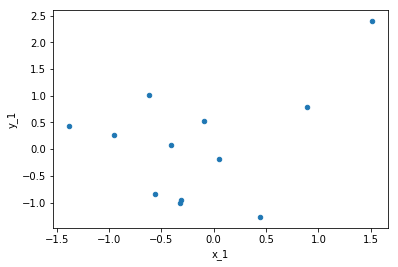

In [92]:
# scatter plot
yx = pd.DataFrame(np.random.randn(12, 2), columns = ['y 1', 'x 1'], index = pd.date_range('2018-05-01', periods = 12, freq = 'M'))
yx.columns = yx.columns.str.replace(' ','_')
yx.plot.scatter('x_1', 'y_1')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000097577F0>],
      dtype=object)

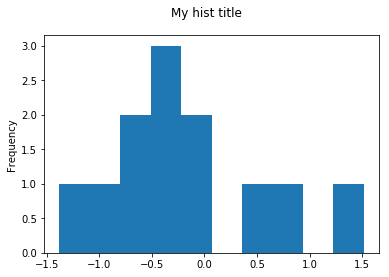

In [93]:
yx['x_1'].dropna().plot(kind='hist',subplots=True,sharex=True,sharey=True,title='My hist title')
# since yx.hist(title=..) does not exist


In [ ]:
# illustrate pd.Dataframe
# a = pd.DataFrame({'a':[3, 4]})

# b = a

# a.iloc[1] = -1

# b
# Out[69]: 
#    a
# 0  3
# 1 -1

# a.drop([0])
# Out[70]: 
#    a
# 1 -1

# b
# Out[71]: 
#    a
# 0  3
# 1 -1

# a
# Out[72]: 
#    a
# 0  3
# 1 -1

# a.drop([0], inplace = True)

# a
# Out[74]: 
#    a
# 1 -1

# b
# Out[75]: 
#    a
# 1 -1

In [2]:
# helper functions
def headtail(x, i = 3):
    print(x.iloc[:, :i].head(i))
    print(x.iloc[:, -i:].tail(i))
    
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
        
def to_clipboard_full(x):
    pd.set_option('display.max_rows', len(x))
    x.to_clipboard(sep = ',')
    pd.reset_option('display.max_rows')

In [ ]:
import os
print(os.getcwd()) 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import datetime
import time

In [10]:
#%quickref

In [27]:
# range of dates 
start_date = datetime.datetime(2017, 10, 20) #datetime.datetime(1995, 1, 1)
end_date = datetime.datetime(2017, 10, 31)
daily_dates = pd.date_range(start_date, end_date)
len(daily_dates)
print(daily_dates) # describe() is for DataFrame

DatetimeIndex(['2017-10-20', '2017-10-21', '2017-10-22', '2017-10-23',
               '2017-10-24', '2017-10-25', '2017-10-26', '2017-10-27',
               '2017-10-28', '2017-10-29', '2017-10-30', '2017-10-31'],
              dtype='datetime64[ns]', freq='D')


In [14]:
range(daily_dates)

TypeError: 'DatetimeIndex' object cannot be interpreted as an integer

In [15]:
for i in range(len(daily_dates)):
    print(daily_dates[i].date())

2017-10-20
2017-10-21
2017-10-22
2017-10-23
2017-10-24
2017-10-25
2017-10-26
2017-10-27
2017-10-28
2017-10-29
2017-10-30
2017-10-31


In [26]:
# otherwise plots will not appear
%matplotlib 

Using matplotlib backend: Qt5Agg


In [27]:
plt.plot(np.random.rand(50).cumsum())

In [21]:
pd.date_range(datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 15))

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# allocate empty time-series based on index and cols of existing one called d
 x = pd.DataFrame(np.nan, index = d.index, columns = d.columns)

In [19]:
# easiest way to allocate empty DataFrame
bt_ret = pd.DataFrame(np.nan, index = pd.date_range(start = datetime.datetime(2017, 1, 1),
                                                    end = datetime.datetime(2017, 1, 15)), 
                                                    columns = ['top', 'bot', 'all'])            

print(bt_ret.head())
print(bt_ret.tail())

            top  bot  all
2017-01-01  NaN  NaN  NaN
2017-01-02  NaN  NaN  NaN
2017-01-03  NaN  NaN  NaN
2017-01-04  NaN  NaN  NaN
2017-01-05  NaN  NaN  NaN
            top  bot  all
2017-01-11  NaN  NaN  NaN
2017-01-12  NaN  NaN  NaN
2017-01-13  NaN  NaN  NaN
2017-01-14  NaN  NaN  NaN
2017-01-15  NaN  NaN  NaN


In [12]:
# add or subtract timeseries, even if univariate, if not defined as pd.Series (but dataframe instead) must addess column
bt_ret['top'] - bt_ret['all']
# or e.g. 
# [ray.iloc[:, 0] - rf.iloc[:, 0]

2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
2017-01-07   NaN
2017-01-08   NaN
2017-01-09   NaN
2017-01-10   NaN
2017-01-11   NaN
2017-01-12   NaN
2017-01-13   NaN
2017-01-14   NaN
2017-01-15   NaN
Freq: D, dtype: float64

In [ ]:
# subtract a timeseries (risk free rate) from multiple other time-series
## first merge to be subtracted ts to ts we want it subtracted from
#tt2 = pd.concat([tt, rf_d[rf_d.index.isin(tt.index)]], axis = 1)
## then use .subtract(, 0)
#tt2[tt.columns].subtract(tt2['LD12TRUU Index'], 0)
# no, we can do simply in one go:
tt.subtract(rf_d.loc[rf_d.index.isin(tt.index), 'LD12TRUU Index'], 0).head()

In [13]:
# check if an objecte is a dataframe
isinstance(bt_ret, pd.DataFrame)

True

In [ ]:
# R: xts.merge()
# mck
# https://wesmckinney.com/blog/faster-time-series-alignment-joins-for-pandas-beating-rs-xts-package/
# Wes McK uses join (compares with xts.merge(), all how types)
    
# Yves Hilpisch
#https://books.google.co.uk/books?id=RhWACgAAQBAJ&pg=PA121&lpg=PA121&dq=hilpisch+%22join(%22+time-series&source=bl&ots=aGgSdmwwGq&sig=ACfU3U2HSG7EzewbVyHl7HwCGhAZ-qP2Eg&hl=en&sa=X&ved=2ahUKEwiGnPLsh57iAhU3SBUIHQkiDrYQ6AEwDHoECAgQAQ#v=onepage&q=hilpisch%20%22join(%22%20time-series&f=false
call.join(puts, how='inner')

In [56]:
# mck 234-236: pd.join() merges by index, but does 'inner' as default
# one can use pd.concat([s1, s2, s3], axis=1) which p237: "is the sorted union (the 'outer' join) of the indexes"
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], 
                    index = ['a', 'c', 'e'],
                    columns = ['Ohio', 'Nevada'])

right2 = pd.DataFrame([[7, 8], [9, 10], [11, 12], [13, 14]], 
                    index = ['b', 'c', 'd', 'e'],
                    columns = ['Missouri', 'Alabama'])
another = pd.DataFrame([[7, 8], [9, 10], [11, 12],[16, 17]], 
                    index = ['a', 'c', 'e', 'f'],
                    columns = ['NY', 'Oregon'])


In [57]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [58]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [59]:
another

,NY,Oregon
a,7,8
c,9,10
e,11,12
f,16,17


In [60]:
left2.join([right2, another], how='outer')

C:\Users\clehmann.LON530L\Anaconda3\lib\site-packages\pandas\core\frame.py:6369: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,NY,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


In [61]:
right2.join([left2, another], how='outer')

,Missouri,Alabama,Ohio,Nevada,NY,Oregon
a,NaN,NaN,1.0,2.0,7.0,8.0
b,7.0,8.0,NaN,NaN,NaN,NaN
c,9.0,10.0,3.0,4.0,9.0,10.0
d,11.0,12.0,NaN,NaN,NaN,NaN
e,13.0,14.0,5.0,6.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


In [62]:
pd.concat([left2, right2, another], axis=1)
# does not exist:
#pd.join([left2, right2, another])

C:\Users\clehmann.LON530L\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Ohio,Nevada,Missouri,Alabama,NY,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


In [48]:
# watch out: add , sort = True to pd.concat([x, y], axis=1, sort = True) to ensures index will be sorted!
#otherwise 
pd.concat([left2, right2, another], axis=1, sort=False)

,Ohio,Nevada,Missouri,Alabama,NY,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


In [49]:
from datetime import datetime

In [113]:
# TIME-SERIES - THE CORRECT WAY TO XTS.MERGE() IN PANDAS
# mck 234-236: pd.join() merges by index, but does 'inner' as default
# one can use pd.concat([s1, s2, s3], axis=1) which p237: "is the sorted union (the 'outer' join) of the indexes"

#left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], 
#                    index = [datetime(2011, 1, 1), datetime(2011, 1, 3), datetime(2011, 1, 5)],
#                    columns = ['Ohio', 'Nevada'])
# here not in ordered dates
left2 = pd.DataFrame([[5., 6.], [3., 4.], [1., 2.]], 
                    index = [datetime(2011, 1, 5), datetime(2011, 1, 3), datetime(2011, 1, 1)],
                    columns = ['Ohio', 'Nevada'])


right2 = pd.DataFrame([[7, 8], [9, 10], [11, 12], [13, 14]], 
                    index = [datetime(2011, 1, 2), datetime(2011, 1, 3), datetime(2011, 1, 4), datetime(2011, 1, 5)],
                    columns = ['Missouri', 'Alabama'])
another = pd.DataFrame([[7, 8], [9, 10], [11, 12],[16, 17]], 
                    index = [datetime(2011, 1, 1), datetime(2011, 1, 3), datetime(2011, 1, 5), datetime(2011, 1, 6)],
                    columns = ['NY', 'Oregon'])

In [114]:
left2

,Ohio,Nevada
2011-01-05,5.0,6.0
2011-01-03,3.0,4.0
2011-01-01,1.0,2.0


In [109]:
right2

,Missouri,Alabama
2011-01-02,7,8
2011-01-03,9,10
2011-01-04,11,12
2011-01-05,13,14


In [110]:
another

,NY,Oregon
2011-01-01,7,8
2011-01-03,9,10
2011-01-05,11,12
2011-01-06,16,17


In [111]:
# with DateTimeIndex no sort=T/F required, always sorted!
pd.concat([left2, right2, another], axis=1)

,Ohio,Nevada,Missouri,Alabama,NY,Oregon
2011-01-01,1.0,2.0,NaN,NaN,7.0,8.0
2011-01-02,NaN,NaN,7.0,8.0,NaN,NaN
2011-01-03,3.0,4.0,9.0,10.0,9.0,10.0
2011-01-04,NaN,NaN,11.0,12.0,NaN,NaN
2011-01-05,5.0,6.0,13.0,14.0,11.0,12.0
2011-01-06,NaN,NaN,NaN,NaN,16.0,17.0


In [112]:
# sort has no impact when index is datetime, which is very good as in future sort=False as default
pd.concat([left2, right2, another], axis=1, sort=False)

,Ohio,Nevada,Missouri,Alabama,NY,Oregon
2011-01-01,1.0,2.0,NaN,NaN,7.0,8.0
2011-01-02,NaN,NaN,7.0,8.0,NaN,NaN
2011-01-03,3.0,4.0,9.0,10.0,9.0,10.0
2011-01-04,NaN,NaN,11.0,12.0,NaN,NaN
2011-01-05,5.0,6.0,13.0,14.0,11.0,12.0
2011-01-06,NaN,NaN,NaN,NaN,16.0,17.0


In [92]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,NY,Oregon
2011-01-01,1.0,2.0,NaN,NaN,7.0,8.0
2011-01-02,NaN,NaN,7.0,8.0,NaN,NaN
2011-01-03,3.0,4.0,9.0,10.0,9.0,10.0
2011-01-04,NaN,NaN,11.0,12.0,NaN,NaN
2011-01-05,5.0,6.0,13.0,14.0,11.0,12.0
2011-01-06,NaN,NaN,NaN,NaN,16.0,17.0


In [95]:
# mck 246 importinng multiple time-series from database and CSV
# on github page click on Raw button to get to raw csv data 
data = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/macrodata/macrodata.csv')

In [96]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,"2,710.35","1,707.40",286.90,470.05,"1,886.90",28.98,139.70,2.82,5.80,177.15,0.00,0.00
1,1959,2,"2,778.80","1,733.70",310.86,481.30,"1,919.70",29.15,141.70,3.08,5.10,177.83,2.34,0.74
2,1959,3,"2,775.49","1,751.80",289.23,491.26,"1,916.40",29.35,140.50,3.82,5.30,178.66,2.74,1.09
3,1959,4,"2,785.20","1,753.70",299.36,484.05,"1,931.30",29.37,140.00,4.33,5.60,179.39,0.27,4.06
4,1960,1,"2,847.70","1,770.50",331.72,462.20,"1,955.50",29.54,139.60,3.50,5.20,180.01,2.31,1.19


In [97]:
# convert year quarter cols into a pd.PeriodIndex (PeriodIndex p 342)
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name = 'date')

In [98]:
periods[:3]

PeriodIndex(['1959Q1', '1959Q2', '1959Q3'], dtype='period[Q-DEC]', name='date', freq='Q-DEC')

In [99]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name = 'item')

In [100]:
data.index

RangeIndex(start=0, stop=203, step=1)

In [101]:
type(data.columns)

pandas.core.indexes.base.Index

In [102]:
data[['realgdp', 'infl', 'unemp']].head()

,realgdp,infl,unemp
0,"2,710.35",0.00,5.80
1,"2,778.80",2.34,5.10
2,"2,775.49",2.74,5.30
3,"2,785.20",0.27,5.60
4,"2,847.70",2.31,5.20


In [103]:
data = data.reindex(columns = columns) # why not just using data[['realgdp', 'infl', 'unemp']] ? maybe to label axis as 'item'

In [104]:
data.head()

item,realgdp,infl,unemp
0,"2,710.35",0.00,5.80
1,"2,778.80",2.34,5.10
2,"2,775.49",2.74,5.30
3,"2,785.20",0.27,5.60
4,"2,847.70",2.31,5.20


In [105]:
data.index = periods.to_timestamp('D', 'end') # very nice, last day in each period (instead of 1959Q1)

In [106]:
data.head()

item,realgdp,infl,unemp
date,,,
1959-03-31,"2,710.35",0.00,5.80
1959-06-30,"2,778.80",2.34,5.10
1959-09-30,"2,775.49",2.74,5.30
1959-12-31,"2,785.20",0.27,5.60
1960-03-31,"2,847.70",2.31,5.20


In [107]:
# pivot from 'long' to 'wide' (long to wide) format
type(data.stack()) # is a pandas.Series

pandas.core.series.Series

In [108]:
data.stack().head() # see below: we need to reset_index

date        item   
1959-03-31  realgdp   2,710.35
            infl          0.00
            unemp         5.80
1959-06-30  realgdp   2,778.80
            infl          2.34
dtype: float64

In [112]:
data.stack().index[1] # 1959-03-31, realgdp is [0]

(Timestamp('1959-03-31 00:00:00', freq='Q-DEC'), 'infl')

In [158]:
data.stack().index[3] # 1959-06-30, realgdp is [3]

(Timestamp('1959-06-30 00:00:00', freq='Q-DEC'), 'realgdp')

In [113]:
# reset index
# so here is our ldata as in mck p 246, note that because of reset_index, the row index is no longer the date
data.stack().reset_index().head()

,date,item,0
0,1959-03-31,realgdp,"2,710.35"
1,1959-03-31,infl,0.00
2,1959-03-31,unemp,5.80
3,1959-06-30,realgdp,"2,778.80"
4,1959-06-30,infl,2.34


In [114]:
# let's rename col 0 to 'value'
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [115]:
ldata.head()

,date,item,value
0,1959-03-31,realgdp,"2,710.35"
1,1959-03-31,infl,0.00
2,1959-03-31,unemp,5.80
3,1959-06-30,realgdp,"2,778.80"
4,1959-06-30,infl,2.34


In [167]:
# as mck writes, this is often the SQL schema, so let's pretend we import this and convert from long to wide format (unstack):
ldata.pivot('date', 'item').head()
# below, in order to get rid of the hierarchical column 'value', we will pass 'value' as the third (optional parameter)
# but first the multi-collumn 'out-of-the-box' result

value                
item        infl   realgdp unemp
date                            
1959-03-31  0.00  2710.349   5.8
1959-06-30  2.34  2778.801   5.1
1959-09-30  2.74  2775.488   5.3
1959-12-31  0.27  2785.204   5.6
1960-03-31  2.31  2847.699   5.2

In [168]:
# to get rid of the hierarchical column 'value', we pass 'value' as the third (optional parameter)
ldata.pivot('date', 'item', 'value').head() # OK, back to the wide format we created at the start from the csv

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [171]:
# mck alternatively 248: 'note that pivot is equivalent to creating a hierarchical 
# index using set_index followed by a call to unstack:'
ldata.set_index(['date', 'item']).unstack().head()

value                
item        infl   realgdp unemp
date                            
1959-03-31  0.00  2710.349   5.8
1959-06-30  2.34  2778.801   5.1
1959-09-30  2.74  2775.488   5.3
1959-12-31  0.27  2785.204   5.6
1960-03-31  2.31  2847.699   5.2

In [169]:
# to show the intnermediate step above,  i.e. create hierarchical index in the long format first (and then unstack)
ldata.set_index(['date', 'item']).head()

value
date       item             
1959-03-31 realgdp  2710.349
           infl        0.000
           unemp       5.800
1959-06-30 realgdp  2778.801
           infl        2.340

In [180]:
# do the wide to long again, but instead of using stack(), use melt()
# for comparison: wide to long using stack:
data.head()

item,realgdp,infl,unemp
date,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2


In [184]:
pd.melt(data).head() # not what we want

,item,value
0,realgdp,2710.349
1,realgdp,2778.801
2,realgdp,2775.488
3,realgdp,2785.204
4,realgdp,2847.699


In [189]:
# we cannot do: pd.melt(data, ['date']).head() # as 'date' is not a column but the row index in data

In [190]:
# first put row index into a col 'date'
data.reset_index().head()

item,date,realgdp,infl,unemp
0,1959-03-31,2710.349,0.00,5.8
1,1959-06-30,2778.801,2.34,5.1
2,1959-09-30,2775.488,2.74,5.3
3,1959-12-31,2785.204,0.27,5.6
4,1960-03-31,2847.699,2.31,5.2


In [278]:
# and then melt, seems we cannot convert multiple time-series object in wide format to long time-series in one step (with
# row index staying date throughout)
#pd.melt(data.reset_index(), ['date']).head()

# to sort it acc to date
#melt_data = pd.melt(data.reset_index(), ['date']).sort_values('date').reset_index().drop(columns='index')
melt_data = pd.melt(data.reset_index(), ['date']).sort_values('date').reset_index().drop(columns='index')

In [279]:
melt_data.head()

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340


In [280]:
melt_data.equals(ldata)

False

In [281]:
all(melt_data.index == ldata.index)

True

In [282]:
all(melt_data.item == ldata.item)

False

In [283]:
all(melt_data.value == ldata.value)

False

In [284]:
type(melt_data.value[:10] == ldata.value[:10])

pandas.core.series.Series

In [285]:
np.argmax(np.array(melt_data.value != ldata.value))

12

In [286]:
melt_data.value[10:13] == ldata.value[10:13]

10     True
11     True
12    False
Name: value, dtype: bool

In [287]:
melt_data.iloc[9:15]

,date,item,value
9,1959-12-31,realgdp,2785.204
10,1959-12-31,infl,0.270
11,1959-12-31,unemp,5.600
12,1960-03-31,infl,2.310
13,1960-03-31,unemp,5.200
14,1960-03-31,realgdp,2847.699


In [288]:
ldata.iloc[9:15]

,date,item,value
9,1959-12-31,realgdp,2785.204
10,1959-12-31,infl,0.270
11,1959-12-31,unemp,5.600
12,1960-03-31,realgdp,2847.699
13,1960-03-31,infl,2.310
14,1960-03-31,unemp,5.200


In [289]:
# basically, we sorted acc to date, and item order didn't stay realgdp, inf, unempl, but changed in March 1960
# we can order acc to date and item, but here I haven't figured out yet, how to set order non-alphabetically
melt_data = pd.melt(data.reset_index(), ['date']).sort_values(['date', 'item']).reset_index().drop(columns='index')

In [290]:
melt_data.iloc[9:15]

,date,item,value
9,1959-12-31,infl,0.270
10,1959-12-31,realgdp,2785.204
11,1959-12-31,unemp,5.600
12,1960-03-31,infl,2.310
13,1960-03-31,realgdp,2847.699
14,1960-03-31,unemp,5.200


In [291]:
ldata.sort_values(['date', 'item']).reset_index().drop(columns='index').iloc[9:15]

,date,item,value
9,1959-12-31,infl,0.270
10,1959-12-31,realgdp,2785.204
11,1959-12-31,unemp,5.600
12,1960-03-31,infl,2.310
13,1960-03-31,realgdp,2847.699
14,1960-03-31,unemp,5.200


In [292]:
# to show that the orig csv import based ldata is identical to our melt, order both DataFrame's item col alphabetically
# note that both frames are not really time-series frames in the sense that their index isn't DateTimeIndex or PeriodIndex!
melt_data.equals(ldata.sort_values(['date', 'item']).reset_index().drop(columns='index'))

True

In [293]:
# to convert into time-series DataFrame, reindex
melt_data.head()

,date,item,value
0,1959-03-31,infl,0.000
1,1959-03-31,realgdp,2710.349
2,1959-03-31,unemp,5.800
3,1959-06-30,infl,2.340
4,1959-06-30,realgdp,2778.801


In [294]:
type(melt_data.date)

pandas.core.series.Series

In [299]:
melt_data.index = melt_data.date
melt_data = melt_data.drop(columns='date')

In [300]:
melt_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 609 entries, 1959-03-31 to 2009-09-30
Data columns (total 2 columns):
item     609 non-null object
value    609 non-null float64
dtypes: float64(1), object(1)
memory usage: 14.3+ KB


In [301]:
melt_data.head()

,item,value
date,,
1959-03-31,infl,0.000
1959-03-31,realgdp,2710.349
1959-03-31,unemp,5.800
1959-06-30,infl,2.340
1959-06-30,realgdp,2778.801


In [116]:
ldata.head()

,date,item,value
0,1959-03-31,realgdp,"2,710.35"
1,1959-03-31,infl,0.00
2,1959-03-31,unemp,5.80
3,1959-06-30,realgdp,"2,778.80"
4,1959-06-30,infl,2.34


In [ ]:
melt_data.value[10:13] == ldata.value[10:13]
# ValueError: Can only compare identically-labeled Series objects

### Create a sqlite3 databse (McK 189)

In [150]:
# McK 189: create a sqlite3
import sqlite3 # see e.g. https://www.tutorialspoint.com/sqlite/sqlite_python.htm

In [154]:
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
c REAL, d INTEGER
);"""

In [152]:
con = sqlite3.connect('mydata.sqlite')

In [155]:
con.execute(query)

In [ ]:
con.commit()

In [156]:
# Insert a few rows of data

In [157]:
data = [('Atlanta', 'Georgia', 1.225, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento','California', 1.7, 5)]

In [158]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

In [159]:
con.executemany(stmt, data)

In [160]:
con.commit()

In [162]:
# select data from table (most Python SQL drivers) return a list of tuples
cursor = con.execute('select * from test')

In [163]:
rows = cursor.fetchall()

In [164]:
rows

[('Atlanta', 'Georgia', 1.225, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [165]:
# you can pass the list of tuples to the DataFrame constructor, but we also need the column names, contained in the 
# cursor's description attribute:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [166]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.23,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [168]:
# all in one (instead of these data munginng steps): use pd.read_sql() to read data easily from a 
# general SQLAlchemy connection (which is a SQL toolkit that abstracts away many of the commom differences beteween
# SQL databases):
import sqlalchemy as sqla

In [170]:
db = sqla.create_engine('sqlite:///mydata.sqlite')

In [171]:
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.23,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [332]:
a = pd.DataFrame(np.arange(5), columns=['val'])

In [333]:
b = pd.DataFrame([-1, 1, -2, 3, 4], columns=['val'])

In [334]:
a.val == b.val

0    False
1     True
2    False
3     True
4     True
Name: val, dtype: bool

In [335]:
(a.val == b.val).idxmax()

1

In [336]:
a[a.val==b.val].index # instead of using np.argmin(np.array(df)) or df.idxmax()

Int64Index([1, 3, 4], dtype='int64')

# Time Series

In [136]:
from datetime import datetime
from dateutil.parser import parse

In [25]:
now = datetime.now()

In [26]:
now

datetime.datetime(2019, 5, 22, 10, 18, 27, 626261)

To store only date (mck 321)

In [27]:
datetime.date(now)

datetime.date(2019, 5, 22)

In [28]:
now.year, now.month, now.day

(2019, 5, 22)

In [31]:
type(now)

datetime.datetime

In [32]:
type(now.date())

datetime.date

In [23]:
# difference in e.g. days
datetime(2019, 6, 24) - datetime(2018, 6, 24)

datetime.timedelta(days=365)

Convert a string to datetime

In [21]:
parse('2019-06-24')

datetime.datetime(2019, 6, 24, 0, 0)

In [22]:
parse('2019-06-24').month

6

In [33]:
# to print in certain format
now.strftime('%Y-%b-%d')

'2019-May-22'

In [35]:
now.strftime('%F') # that's really nice

'2019-05-22'

In [36]:
#bloomberg type
now.strftime('%D')

'05/22/19'

Convert a list of strings representing dates into datetime

In [39]:
datestrings = ['2019-04-26', '2019-04-27', '2019-04-28']

In [38]:
# best way is to do vectorized using pandas pd.to_datetime()

In [41]:
pd.to_datetime(datestrings)

DatetimeIndex(['2019-04-26', '2019-04-27', '2019-04-28'], dtype='datetime64[ns]', freq=None)

In [42]:
# just for sake of completeness (use pd.to_datetime is recommended, as it's vectorized):
# using list comprehension (to me still astonishing that parse and other basic fcts like datetime.strptime() aren't vectorized
# like as.Date in R is)
[parse(x) for x in datestrings]

[datetime.datetime(2019, 4, 26, 0, 0),
 datetime.datetime(2019, 4, 27, 0, 0),
 datetime.datetime(2019, 4, 28, 0, 0)]

In [47]:
# just for sake of completeness (use pd.to_datetime is recommended, as it's vectorized):
[datetime.strptime(x, '%Y-%m-%d') for x in datestrings] #'%F doesn't work

[datetime.datetime(2019, 4, 26, 0, 0),
 datetime.datetime(2019, 4, 27, 0, 0),
 datetime.datetime(2019, 4, 28, 0, 0)]

NA in datetime object is labelled as NaT (not a time)

In [50]:
 pd.to_datetime(datestrings + [np.nan])

DatetimeIndex(['2019-04-26', '2019-04-27', '2019-04-28', 'NaT'], dtype='datetime64[ns]', freq=None)

Basic time-series object in pandas: Series indexed by timestamps. Under the hood these timestamps are saved as DatetimeIndex. 

__Most importantly: like other Series, arithmetic operations between differently indexed time series automatically align on the date:__

In [118]:
# here we use important pd.date_range
dates = pd.date_range('2019-01-31', periods=5, freq='M') # 'M' is MonthEnd ! correct end of the month dates, so we could pass
# 2019-01-01 as start date and would still give 2019-01-31

In [119]:
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31'],
              dtype='datetime64[ns]', freq='M')

In [120]:
ts = pd.Series(np.random.randn(5), index = dates)

In [121]:
ts

2019-01-31   -0.66
2019-02-28   -2.19
2019-03-31    0.21
2019-04-30   -0.42
2019-05-31   -0.54
Freq: M, dtype: float64

In [122]:
ts[::2]

2019-01-31   -0.66
2019-03-31    0.21
2019-05-31   -0.54
Freq: 2M, dtype: float64

In [123]:
ts + ts[::2]

2019-01-31   -1.31
2019-02-28     nan
2019-03-31    0.42
2019-04-30     nan
2019-05-31   -1.08
dtype: float64

In [124]:
ts['2019-03-31']

0.2104209439103673

In [125]:
ts['31/3/2019']

0.2104209439103673

In [126]:
ts['3/31/2019'] # watch out: how is it for dates which are ambiguous?

0.2104209439103673

In [127]:
# use MS MonthStart
ts_monthstart = pd.Series(np.random.randn(5), index = pd.date_range('2019-01-01', periods=5, freq='MS'))

In [128]:
ts_monthstart

2019-01-01   -1.13
2019-02-01    0.68
2019-03-01   -1.41
2019-04-01   -0.92
2019-05-01    0.37
Freq: MS, dtype: float64

In [129]:
ts_monthstart['2019-02-01']

0.67775794155939

In [130]:
ts_monthstart['3/1/2019'] # watch out: this is interpreted as m/d/Y, my recomm: use Y-m-d

-1.4124604312573945

slide ts (Series, for DataFrame, use loc. Remember slicing this way produces views (no data is copied). It's like slicing NumPy arrays

In [131]:
ts

2019-01-31   -0.66
2019-02-28   -2.19
2019-03-31    0.21
2019-04-30   -0.42
2019-05-31   -0.54
Freq: M, dtype: float64

In [132]:
ts['2019-02-28':'2019-04-30'] # like in R (also remember: pandas slice is including end value)

2019-02-28   -2.19
2019-03-31    0.21
2019-04-30   -0.42
Freq: M, dtype: float64

In [133]:
ts[:'2019-02-28'] # as in R: slice until date

2019-01-31   -0.66
2019-02-28   -2.19
Freq: M, dtype: float64

In [134]:
ts['2019-02-28':] # as in R: slice from date

2019-02-28   -2.19
2019-03-31    0.21
2019-04-30   -0.42
2019-05-31   -0.54
Freq: M, dtype: float64

Remember, index labels don't have to be unique! So duplicated dates are possible and can be checked with __.is_unique__ property:

In [137]:
dup_ts = pd.Series(np.arange(3), [datetime(2019, 1, 1), datetime(2019, 1, 1), datetime(2019, 1, 2)])

pandas time-series DatetimeIndex can be defined either by passing a list of datetime objects (which best uses datetime(2019, 01, 01) format, or (easier?) just use pd.DatetimeIndex(['2019-01-01', '2019-01-02']) format

In [138]:
dup_ts = pd.Series(np.arange(3), pd.DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-02'])) # use this way

In [139]:
dup_ts

2019-01-01    0
2019-01-01    1
2019-01-02    2
dtype: int32

In [140]:
dup_ts.index.is_unique

False

In [141]:
# lead and lag ts (R: xts.lag())
ts

2019-01-31   -0.66
2019-02-28   -2.19
2019-03-31    0.21
2019-04-30   -0.42
2019-05-31   -0.54
Freq: M, dtype: float64

In [142]:
ts.shift(1)

2019-01-31     nan
2019-02-28   -0.66
2019-03-31   -2.19
2019-04-30    0.21
2019-05-31   -0.42
Freq: M, dtype: float64

In [143]:
# if freq is known, it can be passed to shift to advance timestamps intead of simmply the data
ts.shift(1, 'M')

2019-02-28   -0.66
2019-03-31   -2.19
2019-04-30    0.21
2019-05-31   -0.42
2019-06-30   -0.54
Freq: M, dtype: float64

In [144]:
# percent change in ts (e.g. returns)
ts / ts.shift(1) - 1

2019-01-31     nan
2019-02-28    2.34
2019-03-31   -1.10
2019-04-30   -3.00
2019-05-31    0.29
Freq: M, dtype: float64

Percent change (mck 313)

In [145]:
ts.pct_change() # see above: ts / ts.shift(1) -1

2019-01-31     nan
2019-02-28    2.34
2019-03-31   -1.10
2019-04-30   -3.00
2019-05-31    0.29
Freq: M, dtype: float64

In [ ]:
# to shift dates with offset see mck 335

In [102]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2019, 5, 22)
print(now +  MonthEnd(1)) # foll forward the date to the next date acc to the date rule (month end here)
print(now +  MonthEnd(2))

2019-05-31 00:00:00
2019-06-30 00:00:00


Periods can be constructed with pd.period_range function. The PeriodIndex class stores a sequence of periods and ca serve as an axis index in any pandas data structure (similar to DatetimeIndex)

In [104]:
periods = pd.period_range('2017-12-01', periods=3, freq='M') # similar to R: as.yearmonth()

In [105]:
periods

PeriodIndex(['2017-12', '2018-01', '2018-02'], dtype='period[M]', freq='M')

In [107]:
pd.Series(np.random.randn(3), index=periods)

2017-12    0.573696
2018-01    2.117032
2018-02    1.264797
Freq: M, dtype: float64

In [108]:
# to convert from an array (list) of strings, we can use pd.PeriodIndex class (similar to pd.DatetimeIndex())
period_strings = ['2001Q3', '2001Q4', '2002Q1']

In [109]:
pd.PeriodIndex(period_strings, freq='Q-DEC')

PeriodIndex(['2001Q3', '2001Q4', '2002Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

we can convert Series and DataFrame objects indexed by timestamps to periods with `to_period` method, and back to timestamps using `to_timestamps`

In [149]:
ts

2019-01-31   -0.66
2019-02-28   -2.19
2019-03-31    0.21
2019-04-30   -0.42
2019-05-31   -0.54
Freq: M, dtype: float64

In [146]:
ts.to_period() # freq of new PeriodIndex is infered from timestamps by default

2019-01   -0.66
2019-02   -2.19
2019-03    0.21
2019-04   -0.42
2019-05   -0.54
Freq: M, dtype: float64

In [147]:
# but can be specified, watch out here now we have overlapping periods (see resample to keep only e.g. last value)
ts.to_period('Q')

2019Q1   -0.66
2019Q1   -2.19
2019Q1    0.21
2019Q2   -0.42
2019Q2   -0.54
Freq: Q-DEC, dtype: float64

In [148]:
# back to timestamps: note the how='end'
ts.to_period().to_timestamp(how='end')

2019-01-31   -0.66
2019-02-28   -2.19
2019-03-31    0.21
2019-04-30   -0.42
2019-05-31   -0.54
Freq: M, dtype: float64

For quarterly data (mck 344), one has to specify which of the 12 possible quarterly frequencies, i.e. relative to the fiscal year end

In [117]:
p = pd.Period('2012Q4', freq = 'Q-SEP')

In [119]:
p.asfreq('D', 'end') # since we defined that the fiscal year ends at the end of sep, the last day of Q4 2012 is 30 Sep 2012

Period('2012-09-30', 'D')

In [120]:
# range of quarterly data
pd.period_range('2012Q1', periods = 4, freq='Q-DEC')

PeriodIndex(['2012Q1', '2012Q2', '2012Q3', '2012Q4'], dtype='period[Q-DEC]', freq='Q-DEC')

In [122]:
pd.period_range('2012Q1', periods = 4, freq='Q-DEC').asfreq('D', 'end')

PeriodIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31'], dtype='period[D]', freq='D')

Resampling (down and upsampling

In [136]:
rng = pd.date_range('2018-01-01', periods=60, freq='D')

In [162]:
np.random.seed( 30 )
rets_d = pd.Series(np.random.randn(len(rng)).cumsum(), index=rng)

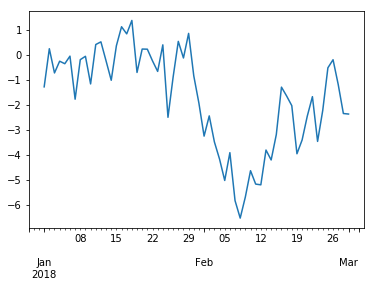

In [163]:
rets_d.plot()

`asfreq` can be used when you want to change a `DatetimeIndex` to have a different frequency while retaining the same values at the current index (https://stackoverflow.com/questions/18060619/difference-between-asfreq-and-resample)
`resample` allows to pass aggregation methods. Pandas help: "Returns the original data conformed to a new index with the specified frequency. resample is more appropriate if an operation, such as summarization, is necessary to represent the data at the new frequency."

In [164]:
rets_w = rets.resample('W').asfreq()

In [186]:
rets_w_2 = rets.asfreq('W') # in this situation (no aggregation of values), we can simply use asfreq()

In [187]:
rets_w.dropna().equals(rets_w_2.dropna()) # we have to drop last value which is NA, otherwise equals is False

True

In [188]:
pd.concat([rets_w, rets_w_2], 1)

,0,1
2018-01-07,-1.759165,-1.759165
2018-01-14,-1.000141,-1.000141
2018-01-21,0.244920,0.244920
2018-01-28,-0.106814,-0.106814
2018-02-04,-4.161556,-4.161556
2018-02-11,-5.160500,-5.160500
2018-02-18,-2.017362,-2.017362
2018-02-25,-0.500414,-0.500414
2018-03-04,NaN,NaN


In [168]:
rets_d_w = pd.concat([rets_d, rets_w], axis=1)

In [170]:
rets_d_w.columns = ['daily', 'weekly']

In [172]:
rets_d_w.head(15)

,daily,weekly
2018-01-01,-1.264053,NaN
2018-01-02,0.263853,NaN
2018-01-03,-0.706858,NaN
2018-01-04,-0.236299,NaN
2018-01-05,-0.336995,NaN
2018-01-06,-0.033202,NaN
2018-01-07,-1.759165,-1.759165
2018-01-08,-0.174069,NaN
2018-01-09,-0.039773,NaN
2018-01-10,-1.146628,NaN


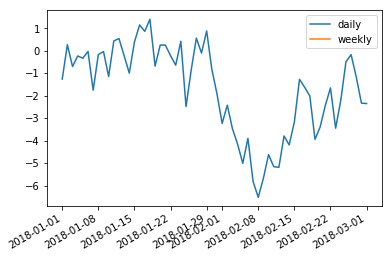

In [173]:
rets_d_w.plot()

In [174]:
rets_w

2018-01-07   -1.759165
2018-01-14   -1.000141
2018-01-21    0.244920
2018-01-28   -0.106814
2018-02-04   -4.161556
2018-02-11   -5.160500
2018-02-18   -2.017362
2018-02-25   -0.500414
2018-03-04         NaN
Freq: W-SUN, dtype: float64

In [175]:
rets.asfreq('W')

2018-01-07   -1.759165
2018-01-14   -1.000141
2018-01-21    0.244920
2018-01-28   -0.106814
2018-02-04   -4.161556
2018-02-11   -5.160500
2018-02-18   -2.017362
2018-02-25   -0.500414
Freq: W-SUN, dtype: float64

## Moving Window Functions

In [9]:
# mck 356
close_px_all = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/stock_px_2.csv')

In [10]:
close_px_all.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


Watch out: `pd.read_csv` use `parse_dates` and `index_col`:

In [11]:
close_px_all = pd.read_csv('https://raw.githubusercontent.com/awesm/pydata-book/2nd-edition/examples/stock_px_2.csv',
                          parse_dates=True, index_col=0)

In [14]:
close_px_all.head(10)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


In [13]:
type(close_px_all.index) # so parse_dates converts into DatetimeIndex, not PeriodIndex ()

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
close_px_all.shape

(2214, 4)

Resample to business day. Although a quick .head() shows it seems it already is, doing it increases the number of rows, so we were infact missing dates before. Good to bring all series to B days then to have identical dates! Since the data is prices foward fill:

In [19]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']].resample('B').ffill()

In [26]:
close_px.isnull().sum()

AAPL    0
MSFT    0
XOM     0
dtype: int64

In [27]:
# w/o ffill (we then use asfreq() after resample()), we have some NAs
close_px_all[['AAPL', 'MSFT', 'XOM']].resample('B').asfreq().isnull().sum()
# which ones
# close_px_all.AAPL.resample('B').asfreq()[close_px_all.AAPL.resample('B').asfreq().isnull()].head()

AAPL    78
MSFT    78
XOM     78
dtype: int64

In [20]:
close_px.shape

(2292, 3)

In [22]:
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


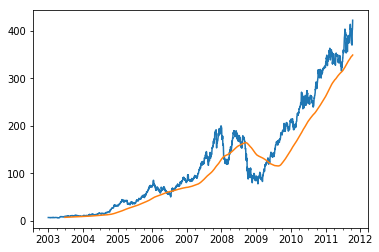

In [33]:
close_px.AAPL.plot()
close_px.AAPL.rolling(252, min_periods=np.int(252/2)).mean().plot()

In [41]:
np.sqrt(252)

15.874507866387544

Plot the 250-day daily return standard deviation (change price to returns using `.pct_change`

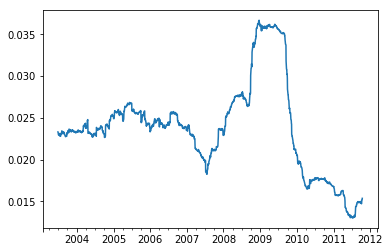

In [40]:
close_px.AAPL.pct_change().rolling(252, min_periods=np.int(252/2)).std().plot()

In [37]:
close_px.AAPL.pct_change().std()

0.002055045287705261

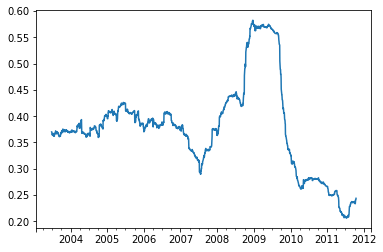

In [52]:
(close_px.AAPL.pct_change().rolling(252, min_periods=np.int(252/2)).std()*np.sqrt(252)).plot()

In [73]:
train_dates = np.intersect1d(close_px.index, pd.date_range('2004-01-01','2009-12-31'))

In [107]:
X = close_px[['MSFT', 'XOM']].pct_change().dropna()

In [108]:
y = close_px.AAPL.pct_change().dropna()

In [109]:
lsfit = sm.regression.linear_model.OLS(y, sm.add_constant(X)).fit()

In [110]:
lsfit.params

const   0.00
MSFT    0.46
XOM     0.30
dtype: float64

In [221]:
def regress(predictor, response, start, end, halflife, outlier_cap=2):
    '''
        helper function to run regression
        predictor: dataframe of predictors
        response: series of response
        start: start date
        end: end date
        halflife: halflife to weight regression exponentially
    '''
    # Author: http://www.chloe-hsu.com/html/multivariate_rolling_regression
    # CL: for s.e. we need to use statsmodels insntead of scikit-learn
    y = response[start:end].values
    X = predictor[start:end].values
    
    # cap both y and X at 2 standard deviations to avoid heavy influence of outliers
    y = np.clip(y, -outlier_cap * np.std(y), outlier_cap * np.std(y))
    X = np.clip(X, -outlier_cap * np.std(X, axis=0), outlier_cap * np.std(X, axis=0))
    
    assert X.shape[0] == y.shape[0], "predictor and response are not the same length"
    
    w = np.ones(y.shape)
    decay = 2.0 ** (-1.0/halflife)
    for i in range(len(w)-2, -1, -1):
        w[i] = w[i+1] * decay
    
    reg = LinearRegression(normalize=False)
    reg.fit(X, y, sample_weight=w)
    return reg

In [306]:
# rolling OLS
# http://www.chloe-hsu.com/html/multivariate_rolling_regression
# no solution found

# for s.e. we need to use statsmodels
from sklearn.linear_model import LinearRegression 
roll_wind = 52 * 5
roll_halflife = 52 * 5

reg = np.empty(len(train_dates), dtype=object)
for t in range(roll_wind, len(train_dates)):
    reg[t] = regress(X, y, 
                     train_dates[t-roll_wind], train_dates[t], 
                     roll_halflife)
regobj = pd.Series(reg[roll_wind:], index=train_dates[roll_wind:], name='regress_object')

We have a Series of OLS objects, now we transform (using `map()`) it to two Series, each one having time-varying betas (one to x1, the other to x2; intercept we don't use). 
In R: (see e.g. Lander p 286) plyr::ldply(list_with_cvglmnet_obj, extractGlmnetInfo), or
Reduce(rbind, lapply(list_with_cvglmnet_obj, extractGlmnetInfo)
with extractGlmnetInfo being a self-defined fct to extract info from cv.glment object.

My own approach to get what plyr::ldply does:<br>
1. Convert list of regression objects into Series
2. Define fct regobj_extract_coef which extracts intercept and coefs and returns them in an 1d array: regobj.apply(regobj_extract_coef) gives a Series with elements being the 1d array (or a list) of regression coefs
3. Series of 1d arrays: convert to DataFrame: pd.DataFrame(reg_coefs.tolist(), index= reg_coefs.index, columns = ['(Intercept)'] + X.columns.tolist())

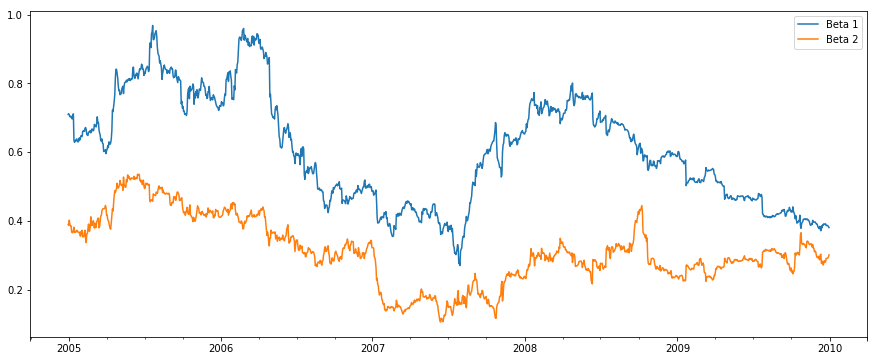

In [307]:
plt.figure(figsize=(15,6))
regobj.map(lambda x: x.coef_[0]).plot(label='Beta 1')
regobj.map(lambda x: x.coef_[1]).plot(label='Beta 2')
plt.legend()
plt.show()

Let's try to write the code to extract all regression coef into one multi-variate ts (DataFrame), instead of one Series for each predictor...

In [345]:
# to see all methods and attributes of a LinearRegression object: 
# tt = regress(X, y,train_dates[t-roll_wind], train_dates[t], roll_halflife)
# tt.coef_ # default: coefs are 1d array (so probably most consistent to return array instead of list as in alternative 
# regobj_extract_coef_listreturn below)
# array([0.38161949, 0.30251545])
# dir(tt)
def regobj_extract_coef(x):
    return(np.append(x.intercept_, x.coef_)) # e.g. two predictors and intercept: array([0.42, 0.38, 0.32])    

In [309]:
tt = regress(X, y,train_dates[t-roll_wind], train_dates[t], roll_halflife)

In [310]:
tt.coef_ # default: coefs are 1d array

array([0.38161949, 0.30251545])

In [311]:
tt.coef_.tolist()

[0.38161949482900165, 0.30251545323536816]

In [312]:
reg_coefs = regobj.apply(regobj_extract_coef)

In [313]:
#reg_coefs is still a Series with elements being arrays of length npredictors + 1 (intercept)
reg_coefs.shape

(1306,)

In [314]:
(reg_coefs.iloc[0]) # each row of the Series is an 1d numpy array

array([0.00298925, 0.71032592, 0.39098159])

In [315]:
type((reg_coefs.iloc[0]))

numpy.ndarray

In [316]:
reg_coefs.iloc[0].shape

(3,)

In [317]:
reg_coefs.tolist()[:3] # that's the way to go below, to split the Series of 1d arrays of lenght 3 into DataFrame with 3 cols

[array([0.00298925, 0.71032592, 0.39098159]),
 array([0.00294792, 0.71205426, 0.38828055]),
 array([0.00288327, 0.70896581, 0.40317866])]

In [318]:
reg_coefs.values[:3] # just to show (stackoverflow did reg_coefs.values.tolist())

array([array([0.00298925, 0.71032592, 0.39098159]),
       array([0.00294792, 0.71205426, 0.38828055]),
       array([0.00288327, 0.70896581, 0.40317866])], dtype=object)

In [319]:
reg_coefs.values.tolist()[:3] # just to show (stackoverflow did reg_coefs.values.tolist())

[array([0.00298925, 0.71032592, 0.39098159]),
 array([0.00294792, 0.71205426, 0.38828055]),
 array([0.00288327, 0.70896581, 0.40317866])]

In [320]:
X.columns.tolist() # no need for X.columns.values.tolist()

['MSFT', 'XOM']

In [321]:
np.arange(3)

array([0, 1, 2])

In [322]:
# pd.DataFrame splits each 1d array into 3 columns
pd.DataFrame([np.arange(3), np.arange(3)], columns=list('abc'))

,a,b,c
0,0,1,2
1,0,1,2


In [323]:
X.columns#.tolist()

Index(['MSFT', 'XOM'], dtype='object')

In [324]:
# Split the Series' column of arrays into multiple columns, i.e. from Series to DataFrame:
# https://stackoverflow.com/questions/35491274/pandas-split-column-of-lists-into-multiple-columns
# Seems we don't really need this step: pd.Series.values: Return Series as ndarray or ndarray-like depending on the dtype.
# so instead of reg_coefs.values.tolist() (np.tolist() gives a copy of the array as list) 
# we simply call directly reg_coefs.tolist() (which is pd.Series.tolist(), not np.tolist()), i.e. gives a list of arrays
# Trick (great): pd.DataFrame() automatically splits a list elment of type array into multiple columns (see example above)
# We re-use the col names from X (X.columns.values.tolist() or X.columns.tolist())
# Remember this explains why a string list('abc') can be used to label 3 columns... (a string is a tuple (immutable) of chars)
reg_coefs = pd.DataFrame(reg_coefs.tolist(), index= reg_coefs.index, columns = ['(Intercept)'] + X.columns.tolist())

In [325]:
reg_coefs.head(3)

,(Intercept),MSFT,XOM
2004-12-30,0.00,0.71,0.39
2004-12-31,0.00,0.71,0.39
2005-01-03,0.00,0.71,0.40


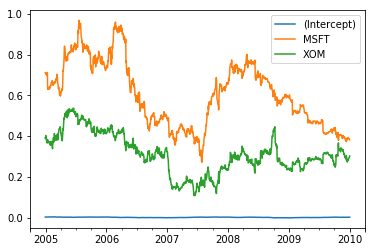

In [326]:
reg_coefs.plot()

Alternatively, the extractor function can return a list of coefs and the following steps stay the same, since pd.DataFrame can convert arrays and lists into mutiple columns

In [346]:
# tt = regress(X, y,train_dates[t-roll_wind], train_dates[t], roll_halflife)
# tt.coef_ # default: coefs are 1d array (so probably most consistent to return array instead of list done here)
# array([0.38161949, 0.30251545])
def regobj_extract_coef_listreturn(x):
    return([x.intercept_] + x.coef_.tolist())

In [347]:
reg_coefs2 = regobj.apply(regobj_extract_coef_listreturn)

In [348]:
(reg_coefs2.iloc[0]) # each row of the Series is a list

[0.002989247887189041, 0.7103259150722351, 0.39098159359208545]

In [349]:
# pd.DataFrame splits each inner list within the outer list into 3 columns, basically like it does for a list of arrays
pd.DataFrame([[0, 1, 2], [0, 1, 2]], columns=list('abc'))

,a,b,c
0,0,1,2
1,0,1,2


In [350]:
reg_coefs2 = pd.DataFrame(reg_coefs2.tolist(), index= reg_coefs2.index, columns = ['(Intercept)'] + X.columns.tolist())

In [351]:
reg_coefs2.head(3)

,(Intercept),MSFT,XOM
2004-12-30,0.00,0.71,0.39
2004-12-31,0.00,0.71,0.39
2005-01-03,0.00,0.71,0.40


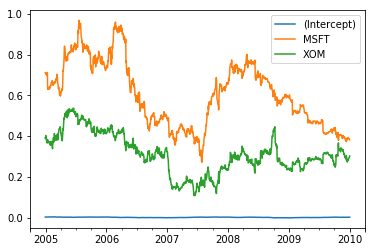

In [352]:
reg_coefs2.plot()

# Great example using times-series, melt, pivot, and reduce

https://elitedatascience.com/wp-content/uploads/2018/05/Pandas-Data-Wrangling-Cheatsheet.pdf

In [3]:
# Read BNC2 sample dataset
#Note that we use the  names= argument for  pd.read_csv() to set our own column names because the original dataset does not have any
df = pd.read_csv('BNC2_sample.csv',
                 names=['Code', 'Date', 'Open', 'High', 'Low', 
                        'Close', 'Volume', 'VWAP', 'TWAP'])
 
# Display first 5 observations
df.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,GWA_BTC,2014-04-01,467.28,488.62,467.28,479.56,"74,776.48",482.76,482.82
1,GWA_BTC,2014-04-02,479.20,494.30,431.32,437.08,"114,052.96",460.19,465.93
2,GWA_BTC,2014-04-03,437.33,449.74,414.41,445.60,"91,415.08",432.29,433.28
3,GWA_BTC,2014-04-04,445.18,456.10,429.16,449.81,"51,147.27",443.46,443.93
4,GWA_BTC,2014-04-05,450.08,464.09,445.16,461.70,"28,449.19",452.53,452.95


In [4]:
len(df.Code.value_counts())

28

In [5]:
# Filter out MWA codesPython
# Number of observations in dataset
print( 'Before:', len(df) )
# Before: 31761
 
# Get all the GWA codes
gwa_codes = [code for code in df.Code.unique() if 'GWA_' in code]
 
# Only keep GWA observations
df = df[df.Code.isin(gwa_codes)]
 
# Number of observations left
print( 'After:', len(df) )
# After: 6309

Before: 31761
After: 6309


In [6]:
# Step 5: Pivot the dataset.
# Next, in order to analyze our momentum trading strategy outlined above, for each cryptocurrency, we'll need calculate returns over the prior 7, 14, 21, and 28 days... for the first day of each month.
# However, it would be a huge pain to do so with the current "stacked" dataset. It would involve writing helper functions, loops, and plenty of conditional logic. Instead, we'll take a more elegant approach....
# First, we'll pivot the dataset while keeping only one price column. For this tutorial, let's keep the VWAP (volume weighted average price) column, but you could make a good case for most of them.
# Pivot dataset
pivoted_df = df.pivot(index='Date', columns='Code', values='VWAP')
 
# Display examples from pivoted dataset
pivoted_df.tail()
# As you can see, each column in our pivoted dataset now represents the price for one cryptocurrency and each row contains prices from one date. All the features are now aligned by date

Code,GWA_BTC,GWA_ETH,GWA_LTC,GWA_XLM,GWA_XRP
Date,,,,,
2018-01-19,"11,826.36","1,068.45",195.00,0.51,1.82
2018-01-20,"13,062.68","1,158.71",207.58,0.52,1.75
2018-01-21,"12,326.23","1,108.90",197.36,0.48,1.55
2018-01-22,"11,397.52","1,038.21",184.92,0.47,1.43
2018-01-23,"10,921.00",992.05,176.95,0.47,1.42


In [7]:
# To easily calculate returns over the prior 7, 14, 21, and 28 days, we can use Pandas's shift method
print( pivoted_df.tail(3) )
print( pivoted_df.tail(3).shift(1) )

Code         GWA_BTC  GWA_ETH  GWA_LTC  GWA_XLM  GWA_XRP
Date                                                    
2018-01-21 12,326.23 1,108.90   197.36     0.48     1.55
2018-01-22 11,397.52 1,038.21   184.92     0.47     1.43
2018-01-23 10,921.00   992.05   176.95     0.47     1.42
Code         GWA_BTC  GWA_ETH  GWA_LTC  GWA_XLM  GWA_XRP
Date                                                    
2018-01-21       nan      nan      nan      nan      nan
2018-01-22 12,326.23 1,108.90   197.36     0.48     1.55
2018-01-23 11,397.52 1,038.21   184.92     0.47     1.43


In [8]:
# Calculate returns over 7 days priorPython
# Calculate returns over 7 days prior
delta_7 = pivoted_df / pivoted_df.shift(7) - 1.0
 
# Display examples
delta_7.tail()

Code,GWA_BTC,GWA_ETH,GWA_LTC,GWA_XLM,GWA_XRP
Date,,,,,
2018-01-19,-0.18,-0.17,-0.18,-0.21,-0.22
2018-01-20,-0.13,-0.19,-0.18,-0.23,-0.29
2018-01-21,-0.15,-0.20,-0.22,-0.22,-0.30
2018-01-22,-0.21,-0.24,-0.24,-0.25,-0.32
2018-01-23,-0.11,-0.12,-0.13,-0.02,-0.04


In [24]:
delta_7.index

Index(['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04', '2014-04-05',
       '2014-04-06', '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10',
       ...
       '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18',
       '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23'],
      dtype='object', name='Date', length=1394)

In [9]:
# Calculate returns over each window and store them in dictionary
delta_dict = {}
for offset in [7, 14, 21, 28]:
    delta_dict['delta_{}'.format(offset)] = pivoted_df / pivoted_df.shift(offset) - 1.0

Now that we've calculated returns using the pivoted dataset, we're going to "unpivot" the returns. By unpivoting, or melting the data, we can later create an analytical base table (ABT) where each row contains all of the relevant information for a particular coin on a particular date.

In [10]:
# Melt shifted dataPython
# Melt delta_7 returns: we don't use this, just to illustrate the unpivot or melt()
# reset_index will add current index (Date) as column
melted_7 = delta_7.reset_index().melt(id_vars=['Date'], value_name='delta_7')
 
# Melted dataframe examples
melted_7.tail()

,Date,Code,delta_7
6965,2018-01-19,GWA_XRP,-0.22
6966,2018-01-20,GWA_XRP,-0.29
6967,2018-01-21,GWA_XRP,-0.30
6968,2018-01-22,GWA_XRP,-0.32
6969,2018-01-23,GWA_XRP,-0.04


In [29]:
# Melt all the delta dataframes and store in list
melted_dfs = []
for key, delta_df in delta_dict.items():
    melted_dfs.append( delta_df.reset_index().melt(id_vars=['Date'], value_name=key) )

In [32]:
# Calculate 7-day returns after the date
return_df = pivoted_df.shift(-7) / pivoted_df - 1.0
 
# Melt the return dataset and append to list
melted_dfs.append( return_df.reset_index().melt(id_vars=['Date'], value_name='return_7') )

In [13]:
# Merge two dataframes
pd.merge(melted_dfs[0], melted_dfs[1], on=['Date', 'Code']).tail()

,Date,Code,delta_7,delta_14
6965,2018-01-19,GWA_XRP,-0.22,-0.41
6966,2018-01-20,GWA_XRP,-0.29,-0.42
6967,2018-01-21,GWA_XRP,-0.30,-0.51
6968,2018-01-22,GWA_XRP,-0.32,-0.52
6969,2018-01-23,GWA_XRP,-0.04,-0.48


In [33]:
# All we need to do now is merge all of our melted dataframes together with a base dataframe of other features we might want
# most elegant way to do this is using Python's reduce function
from functools import reduce

In [34]:
# Grab features from original dataset
base_df = df[['Date', 'Code', 'Volume', 'VWAP']]
 
# Create a list with all the feature dataframes
feature_dfs = [base_df] + melted_dfs

In [36]:
len(feature_dfs)

6

In [21]:
# Reduce applies a function of two arguments cumulatively to the objects in a sequence (e.g. a list). 
# For example,  reduce(lambda x,y: x+y, [1,2,3,4,5]) calculates  ((((1+2)+3)+4)+5)
# Thus, we can reduce-merge all of the features like so:
# Reduce-merge features into analytical base table
# really nice trick!
abt = reduce(lambda left,right: pd.merge(left,right,on=['Date', 'Code']), feature_dfs)
 
# Display examples from the ABT
abt.tail(10)

,Date,Code,Volume,VWAP,delta_7,delta_14,delta_21,delta_28,return_7
6299,2018-01-14,GWA_XRP,"912,107,674.18",2.20,-0.31,0.02,1.06,1.97,-0.30
6300,2018-01-15,GWA_XRP,"823,491,754.55",2.11,-0.29,-0.04,0.92,1.84,-0.32
6301,2018-01-16,GWA_XRP,"3,872,977,355.95",1.48,-0.46,-0.36,0.35,0.85,-0.04
6302,2018-01-17,GWA_XRP,"5,111,390,628.85",1.20,-0.47,-0.57,-0.06,0.58,nan
6303,2018-01-18,GWA_XRP,"5,156,172,462.44",1.68,-0.22,-0.51,0.23,0.59,nan
6304,2018-01-19,GWA_XRP,"2,126,239,927.56",1.82,-0.22,-0.41,0.02,0.65,nan
6305,2018-01-20,GWA_XRP,"1,346,913,296.52",1.75,-0.29,-0.42,-0.26,0.53,nan
6306,2018-01-21,GWA_XRP,"1,886,060,450.81",1.55,-0.30,-0.51,-0.28,0.45,nan
6307,2018-01-22,GWA_XRP,"1,784,992,299.63",1.43,-0.32,-0.52,-0.35,0.30,nan
6308,2018-01-23,GWA_XRP,"2,118,335,564.32",1.42,-0.04,-0.48,-0.39,0.29,nan


In [37]:
# Programmatically pick highest momentumPython

max_momentum_id = abt[abt.Date == '2017-09-01'].delta_28.idxmax()
abt.loc[max_momentum_id, ['Code','return_7']]

Code        GWA_LTC
return_7      -0.10
Name: 3543, dtype: object

In [23]:
# Create 'month' feature
abt['month'] = abt.Date.apply(lambda x: x[:7])
 
# Group by 'Code' and 'month' and keep first date
gb_df = abt.groupby(['Code', 'month']).first().reset_index()
 
# Display examples
gb_df.tail()

,Code,month,Date,Volume,VWAP,delta_7,delta_14,delta_21,delta_28,return_7
204,GWA_XRP,2017-09,2017-09-01,"1,138,500,431.07",0.25,0.15,0.57,0.39,0.44,-0.14
205,GWA_XRP,2017-10,2017-10-01,"242,650,661.68",0.20,0.12,0.12,-0.05,-0.13,0.31
206,GWA_XRP,2017-11,2017-11-01,"344,634,241.50",0.20,-0.03,-0.11,-0.25,-0.05,0.07
207,GWA_XRP,2017-12,2017-12-01,"705,807,839.14",0.25,0.03,0.09,0.17,0.19,-0.00
208,GWA_XRP,2018-01,2018-01-01,"813,772,647.20",2.20,1.01,1.97,7.96,7.77,0.35


In [ ]:
Complete script
# 2. Import libraries and dataset
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
 
df = pd.read_csv('BNC2_sample.csv',
                 names=['Code', 'Date', 'Open', 'High', 'Low', 
                        'Close', 'Volume', 'VWAP', 'TWAP'])
 
# 4. Filter unwanted observations
gwa_codes = [code for code in df.Code.unique() if 'GWA_' in code]
df = df[df.Code.isin(gwa_codes)]
 
# 5. Pivot the dataset
pivoted_df = df.pivot(index='Date', columns='Code', values='VWAP')
 
# 6. Shift the pivoted dataset
delta_dict = {}
for offset in [7, 14, 21, 28]:
    delta_dict['delta_{}'.format(offset)] = pivoted_df / pivoted_df.shift(offset) - 1
    
# 7. Melt the shifted dataset
melted_dfs = []
for key, delta_df in delta_dict.items():
    melted_dfs.append( delta_df.reset_index().melt(id_vars=['Date'], value_name=key) )
 
return_df = pivoted_df.shift(-7) / pivoted_df - 1.0
melted_dfs.append( return_df.reset_index().melt(id_vars=['Date'], value_name='return_7') )
 
# 8. Reduce-merge the melted data
from functools import reduce
 
base_df = df[['Date', 'Code', 'Volume', 'VWAP']]
feature_dfs = [base_df] + melted_dfs
 
abt = reduce(lambda left,right: pd.merge(left,right,on=['Date', 'Code']), feature_dfs)
 
# 9. Aggregate with group-by.
abt['month'] = abt.Date.apply(lambda x: x[:7])
gb_df = abt.groupby(['Code', 'month']).first().reset_index()

Python deals with string as a list of characters (so you an e.g. iterate over it)

In [6]:
type('abc')

str

In [5]:
list('abc')

['a', 'b', 'c']

In [160]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1],
[np.nan, np.nan, np.nan, 5]],
columns=list('ABCD'))

In [161]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [162]:
# R summary including number of NAs
df.isnull().sum()/len(df)*100

A     66.666667
B     33.333333
C    100.000000
D      0.000000
dtype: float64

In [170]:
arr = np.arange(12).reshape(3, -1)

In [171]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [172]:
arr.sum()

66

In [173]:
pd.DataFrame(arr)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [174]:
pd.DataFrame(arr).sum() # without axis, dataframe applies not on flattened array, but colwise (similar to R)

0    12
1    15
2    18
3    21
dtype: int64

In [167]:
df.isnull().sum(1)

0    2
1    1
2    3
dtype: int64

In [ ]:
df.isnull().sum

In [17]:
# missing values stat (NAs)
# from  https://datascience-enthusiast.com/R/ML_python_R_part1.html
# in R: map(power_plant, ~sum(is.na(.)))  # using purrr package
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
A    1 non-null float64
B    2 non-null float64
C    0 non-null float64
D    3 non-null int64
dtypes: float64(3), int64(1)
memory usage: 176.0 bytes


In [106]:
i = df.columns[0]
print(i)
df.A

A


0    NaN
1    3.0
2    NaN
Name: A, dtype: float64

In [44]:
#df.dropna() # obviously drops all rows which have at least NaN in any column
df.dropna(axis='index') # 'index' or 'columns'

,A,B,C,D


In [45]:
# subsetting check https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
# e.g. using iloc
print(df.iloc[0]) # first row
print(df.iloc[:, 0]) # first col

A    NaN
B    2.0
C    NaN
D    0.0
Name: 0, dtype: float64
0    NaN
1    3.0
2    NaN
Name: A, dtype: float64


In [46]:
# using iloc, agin: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
df2 = df
df2['name'] = ['Anna', 'Conrad', np.nan]
df2.set_index("name", inplace=True)
print(df2)
print(df2.loc["Anna"])

          A    B   C  D
name                   
Anna    NaN  2.0 NaN  0
Conrad  3.0  4.0 NaN  1
NaN     NaN  NaN NaN  5
A    NaN
B    2.0
C    NaN
D    0.0
Name: Anna, dtype: float64


In [47]:
# w/o setting the name as index
# using iloc, agin: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
df2 = df
df2['name'] = ['Anna', 'Conrad', np.nan]
print(df2)
print(df2.loc[df2['name'] =="Anna"])
print(df2.loc[df2['A'] == 3])

          A    B   C  D    name
name                           
Anna    NaN  2.0 NaN  0    Anna
Conrad  3.0  4.0 NaN  1  Conrad
NaN     NaN  NaN NaN  5     NaN
       A    B   C  D  name
name                      
Anna NaN  2.0 NaN  0  Anna
          A    B   C  D    name
name                           
Conrad  3.0  4.0 NaN  1  Conrad


In [48]:
print(df2.loc[df2['name'] == "Anna", "B"]) # .loc[<selection>, string] return Series
print(df2.loc[df2['name'] == "Anna", ["B"]]) # .loc[<selection>, List] returns a DataFrame

name
Anna    2.0
Name: B, dtype: float64
        B
name     
Anna  2.0


In [51]:
# select columns based on a list of names plus some other names
# basically how to concatenate lists
mycollist = ['A', 'C']
df2.loc[:, mycollist + ['D']]

,A,C,D
name,,,
Anna,NaN,NaN,0
Conrad,3.0,NaN,1
NaN,NaN,NaN,5


In [28]:
# check if a is in list
'b' in ['a', 'b', 'c']

True

In [52]:
[w in 'b' for w in ['a', 'b', 'c']]

[False, True, False]

In [180]:
np.array(['a', 'b', 'c']) == 'b'

array([False,  True, False])

In [26]:
#data.loc[data['first_name'].isin(['France', 'Tyisha', 'Eric'])]   
print(df2[df2['name'].isin(['Conrad', 'Anna'])]) # is in
print(df2[~df2['name'].isin(['Conrad', 'Anna'])]) # is NOT in

          A    B   C  D    name
name                           
Anna    NaN  2.0 NaN  0    Anna
Conrad  3.0  4.0 NaN  1  Conrad
       A   B   C  D name
name                    
NaN  NaN NaN NaN  5  NaN


In [36]:
df2 = df
df2['name'] = ['Anna', 'Conrad', 'Florian']
df2.set_index('name', inplace=True)
print(df2)
print(df2[~df2.index.isin(['Conrad', 'Anna'])]) # since name is the index

           A   C  D
name               
Anna     NaN NaN  0
Conrad   3.0 NaN  1
Florian  NaN NaN  5
          A   C  D
name              
Florian NaN NaN  5


In [31]:
# string formatting
fname = '{0:s}_{1:d}_spreadsheet.xlsx'
fname.format('Var', 1)

'Var_1_spreadsheet.xlsx'

In [32]:
tmpvar = "VarA"
fname = tmpvar + '_spreadsheet.xlsx'
print(fname)

VarA_spreadsheet.xlsx


In [96]:
# Export the data frame to an Excel spreadsheet
# The Excel spreadsheet is created in the same directory as this notebook
df.to_excel('df_spreadsheet.xlsx', sheet_name='df', index=False)

# Confirm that the file was created
'df_spreadsheet.xlsx' in os.listdir()

# important: to export time series with date col set index=False (see below for ts)

True

In [ ]:
# to_excel can be slow, use
df.to_csv(, sep = ',')

In [ ]:
# alternatively only export a sample of the big dataframe
def DFSample(x, frac = 0.1):
    # frac: percentage of rows and columns to keep
    drop_indices = np.random.choice(x.index, int(len(x.index) * (1-frac)), replace=False)
    x_subset = x.drop(drop_indices)
    drop_indices_c = np.random.choice(x.columns, int(len(x.columns) * (1-frac)), replace=False)
    x_subset = x_subset.drop(drop_indices_c, axis = 1)
    return(x_subset)

In [183]:
%pwd

'C:\\Users\\clehmann.LON530L\\Documents\\Python Scripts\\Jupyter Notebooks'

In [186]:
#os.listdir('c:\\')
tmp_path = %pwd
os.listdir(tmp_path)

['.ipynb_checkpoints',
 'a_but_not_in_b.xlsx',
 'a_in_b.xlsx',
 'b_but_not_in_a.xlsx',
 'b_in_a.xlsx',
 'handson-ml',
 'handson-ml2',
 'Ila.ipynb',
 'MyJupyterSandbox v001.ipynb',
 'MyPSandbox v003.ipynb']

In [338]:
# table()
my_categ_list = pd.DataFrame(['a', 'a', 'b', np.nan, 'c', 'c', 'c'], columns = ['categ'])
print(my_categ_list)
print(my_categ_list.describe())
print('following is equivalent to R\'s table')
print(my_categ_list.categ.value_counts(dropna = False))
# nbr of None
print('number of NaN (None): ', sum(bics_sec.BICS_sec.isnull()))
my_categ_list.loc[my_categ_list.index == 3] # None

  categ
0     a
1     a
2     b
3   NaN
4     c
5     c
6     c
       categ
count      6
unique     3
top        c
freq       3
following is equivalent to R's table
c      3
a      2
b      1
NaN    1
Name: categ, dtype: int64
number of NaN (None):  1


,categ
3,NaN


In [94]:
# Define a new data frame and import data from the local Excel file
df2 = pd.read_excel('df_spreadsheet.xlsx', sheet_name='df', index=False)
# Display the data frame to confirm the import
df2

,0
2000-01-01,-1.092097
2000-01-02,0.223108
2000-01-03,0.115795
2000-01-04,-0.761479
2000-01-05,-0.166912


In [95]:
df2.shape

(5, 1)

In [98]:
# subindex time-series
#df2.loc[df2.index[2], '0']# = np.nan

KeyError: 'the label [0] is not in the [index]'

In [101]:
df2.iloc[[1, 3, 4], 0] = np.nan


In [102]:
df2

,0
2000-01-01,-1.092097
2000-01-02,NaN
2000-01-03,0.115795
2000-01-04,NaN
2000-01-05,NaN


In [90]:
df2.fillna(method='ffill') # how can we fill only until last valid obs 2000-01-03

,0
2000-01-01,-1.092097
2000-01-02,-1.092097
2000-01-03,0.115795
2000-01-04,0.115795
2000-01-05,0.115795


In [35]:
df.B.dropna()

0    2.0
1    4.0
Name: B, dtype: float64

In [36]:
df['A']

0    NaN
1    3.0
2    NaN
Name: A, dtype: float64

In [37]:
df[df.B == 2]

,A,B,C,D
0,NaN,2.0,NaN,0


In [38]:
df.index.name

In [39]:
df.index.name = "my id"

In [40]:
df[df.index == 1]

,A,B,C,D
my id,,,,
1,3.0,4.0,NaN,1


In [41]:
len(df.index.unique())

3

In [42]:
my_list = list(range(4))

In [1]:
df[df.A == 3.0]

NameError: name 'df' is not defined

In [44]:
df_tmp = df

In [53]:
from datetime import datetime, date, time

In [54]:
datetime(2014, 3, 27)

datetime.datetime(2014, 3, 27, 0, 0)

In [55]:
datetime(2014, 3, 27).strftime("%Y-%m-%d")

'2014-03-27'

In [48]:
df_tmp.C = ['2014-03-27', '2014-03-28', '2014-03-29']
#print(pd.to_datetime(df_tmp.C))
df_tmp.C = pd.to_datetime(df_tmp.C)
print(df_tmp)
# if date is not the index: https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates
df_tmp[df_tmp.C == '2014-03-28']

         A    B          C  D
my id                        
0      NaN  2.0 2014-03-27  0
1      3.0  4.0 2014-03-28  1
2      NaN  NaN 2014-03-29  5


,A,B,C,D
my id,,,,
1,3.0,4.0,2014-03-28,1


In [51]:
df_tmp[['A', 'C']]

,A,C
my id,,
0,NaN,2014-03-27
1,3.0,2014-03-28
2,NaN,2014-03-29


In [30]:
# filter for a column which is of type datatime (this is not a timeseries indexed by datetime)
df_tmp[df_tmp.C.dt.year == 2014]

,A,B,C,D
my id,,,,
0,NaN,2.0,2014-03-27,0
1,3.0,4.0,2014-03-28,1
2,NaN,NaN,2014-03-29,5


In [31]:
pd.__version__

'0.20.3'

In [32]:
df_tmp.D.rolling(2).mean()

my id
0    NaN
1    0.5
2    3.0
Name: D, dtype: float64

In [33]:
# check the data type of columns (series in a panda dataframe): similar to R's class()
df_tmp.dtypes

A           float64
B           float64
C    datetime64[ns]
D             int64
dtype: object

In [15]:
type([1, [2, 3]]) # similar to class()

list

In [34]:
for i in range(3):
    print("hi number", i)

hi number 0
hi number 1
hi number 2


In [24]:
dflist = []

In [25]:
for i in range(3):
    df = pd.DataFrame(np.random.randint(0,3,size=(3, 4)), columns=list('ABCD'))
    dflist.append(df)

In [26]:
len(dflist)

3

In [38]:
type(dflist[0])

pandas.core.frame.DataFrame

In [39]:
dflist[0]

,A,B,C,D
0,1,1,0,0
1,2,2,1,1
2,1,0,1,2


In [40]:
dflist[1]

,A,B,C,D
0,2,1,2,0
1,0,0,1,2
2,2,2,1,0


In [41]:
dflist[2]

,A,B,C,D
0,1,0,2,0
1,0,1,0,2
2,0,0,0,1


In [42]:
dfs = pd.concat(dflist)
dfs

,A,B,C,D
0,1,1,0,0
1,2,2,1,1
2,1,0,1,2
0,2,1,2,0
1,0,0,1,2
2,2,2,1,0
0,1,0,2,0
1,0,1,0,2
2,0,0,0,1


In [5]:
import math
nelements = 20
long_list = list(range(nelements))
batch_size = 8
nbatches = math.ceil(nelements / batch_size)
print("we have a long list with", nelements, "elements, which we will process in", nbatches, "batches of size", batch_size)
print("the long list is:", long_list)
dflist = []

def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

for i in range(nbatches):
    slice_obj = slice((i * batch_size), (i + 1) * batch_size)
    print("processing batch", i + 1, ":", long_list[slice_obj])
    print(pd.DataFrame(apply_to_list(long_list[slice_obj], lambda x: x + 10), columns = ['A']))
    dflist.append(pd.DataFrame(apply_to_list(long_list[slice_obj], lambda x: x + 10), columns = ['A']))   
dflist

we have a long list with 20 elements, which we will process in 3 batches of size 8
the long list is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
processing batch 1 : [0, 1, 2, 3, 4, 5, 6, 7]
    A
0  10
1  11
2  12
3  13
4  14
5  15
6  16
7  17
processing batch 2 : [8, 9, 10, 11, 12, 13, 14, 15]
    A
0  18
1  19
2  20
3  21
4  22
5  23
6  24
7  25
processing batch 3 : [16, 17, 18, 19]
    A
0  26
1  27
2  28
3  29


[    A
 0  10
 1  11
 2  12
 3  13
 4  14
 5  15
 6  16
 7  17,     A
 0  18
 1  19
 2  20
 3  21
 4  22
 5  23
 6  24
 7  25,     A
 0  26
 1  27
 2  28
 3  29]

In [4]:
print(len(dflist))
type(dflist)
pd.concat(dflist)

3


,A
0,10
1,11
2,12
3,13
4,14
5,15
6,16
7,17
0,18
1,19


In [46]:
np.random.randn(5)

array([ 0.62129612,  1.40023427,  0.22416346,  0.86895837, -1.1063032 ])

In [7]:
myts = pd.Series(np.random.randn(5), index = pd.date_range('1/1/2000', periods = 5))
myts

2000-01-01   -0.766409
2000-01-02   -1.091082
2000-01-03   -1.549005
2000-01-04   -0.732956
2000-01-05    0.596468
Freq: D, dtype: float64

In [8]:
myts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# slicing like xts date/ etc.
print(myts.truncate(before='2000-01-03'))
print(myts.truncate(after='2000-01-03'))

2000-01-03   -1.549005
2000-01-04   -0.732956
2000-01-05    0.596468
Freq: D, dtype: float64
2000-01-01   -0.766409
2000-01-02   -1.091082
2000-01-03   -1.549005
Freq: D, dtype: float64


In [125]:
# export to excel incl date col
d2xlsx = pd.Series(np.random.randn(5), index = pd.date_range('1/1/2000', periods = 5))
# or to keep only date part (not h:m:s)
d2xlsx = pd.Series(np.random.randn(5), index = pd.date_range('1/1/2000', periods = 5).date)

fname = 'test' + '_spreadsheet.xlsx'
d2xlsx.to_excel('df_spreadsheet.xlsx', sheet_name='df', index=True)

#writer = pd.ExcelWriter(fname)
#d2xlsx.to_excel(writer, sheet_name="sheetName")
#writer.save() # change date format in excel to short (currently h:m:s are shown as well)

In [48]:
long_list[slice_obj]

[18, 19]

In [49]:
np.random.randn(10, 3)

array([[ 0.14896696,  0.24808849,  1.15321639],
       [ 0.31531248, -2.01211043,  1.59192039],
       [-0.486     , -0.67656771,  1.54698645],
       [ 0.76377046, -0.41599385, -0.30952993],
       [-0.90808682, -0.14088166,  1.90421913],
       [-0.52732102, -0.74318168, -0.27848588],
       [-0.54830568,  0.56896373, -1.83689618],
       [-0.50345182,  0.67806733,  1.54159551],
       [-0.09224017, -1.43913465,  0.30652118],
       [ 0.73021129,  1.05838368, -0.38161926]])

In [50]:
np.array([np.arange(10)]*3).T

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5],
       [6, 6, 6],
       [7, 7, 7],
       [8, 8, 8],
       [9, 9, 9]])

In [42]:
import uuid

def my_random_string(string_length=10):
    """Returns a random string of length string_length."""
    random = str(uuid.uuid4()) # Convert UUID format to a Python string.
    random = random.upper() # Make all characters uppercase.
    random = random.replace("-","") # Remove the UUID '-'.
    return random[0:string_length] # Return the random string.

print(my_random_string(6)) 

28357B


In [29]:
colnames_1 = [my_random_string(6), my_random_string(6), my_random_string(6)]
colnames_2 = [my_random_string(6), my_random_string(6), my_random_string(6)]
colnames_empty = colnames_1 + colnames_2
colnames_empty

['011DCD', 'EC2964', 'EF6CCE', '9B4D0A', '9F9F14', 'D7DA53']

In [49]:
df_a = pd.DataFrame(np.random.randn(3,2), columns=['A', 'B'], index=pd.date_range('2000-01-01', periods=3))
df_b = pd.DataFrame(np.random.randn(3,2), columns=['A', 'B'], index=pd.date_range('2000-01-01', periods=3))

In [50]:
df_b

,A,B
2000-01-01,0.979367,-1.546774
2000-01-02,0.129990,-0.182599
2000-01-03,2.730931,-0.153083


In [51]:
df_a

,A,B
2000-01-01,0.784865,0.079784
2000-01-02,-1.474455,-1.575807
2000-01-03,0.497170,1.361268


In [53]:
df_b.iloc[[0, 2], 0] = np.nan
df_b

,A,B
2000-01-01,NaN,-1.546774
2000-01-02,0.12999,-0.182599
2000-01-03,NaN,-0.153083


In [54]:
# filter a with b, i.e. set cells in A which are nan in B to nan in A too
df_a.values

array([[ 0.78486526,  0.07978426],
       [-1.47445489, -1.57580716],
       [ 0.49717003,  1.36126813]])

In [55]:
df_b.isna()

,A,B
2000-01-01,True,False
2000-01-02,False,False
2000-01-03,True,False


In [61]:
df_a[df_b.isna()] = np.nan
df_a

,A,B
2000-01-01,NaN,0.079784
2000-01-02,-1.474455,-1.575807
2000-01-03,NaN,1.361268


In [84]:
# merge two time-series (see xts merge)
df1 = pd.DataFrame(np.random.randn(3,2), columns=list('AB'), index=pd.date_range('2000-01-01', periods=3))
df2 = pd.DataFrame(np.random.randn(3,2), columns=list('CD'), index=pd.date_range('2000-01-01', periods=3))
print(df1)
print(df2)
#print(df1.append(df2))
df1_2 = pd.concat([df1, df2], axis = 1)
print(df1_2)

                   A         B
2000-01-01 -0.466479 -1.224440
2000-01-02 -1.755374  0.470843
2000-01-03  1.391766  3.369270
                   C         D
2000-01-01  1.929263 -3.300375
2000-01-02 -1.259534 -0.313798
2000-01-03  0.201139  0.630648
                   A         B         C         D
2000-01-01 -0.466479 -1.224440  1.929263 -3.300375
2000-01-02 -1.755374  0.470843 -1.259534 -0.313798
2000-01-03  1.391766  3.369270  0.201139  0.630648


In [90]:
# rename column names after concat
df1_2_cols = list(df1_2.columns.values)[0:(df1_2.shape[1]-1)]
df1_2_cols.append('changed colname')
print(df1_2_cols)
df1_2.set_axis(df1_2_cols, axis = 'columns', inplace=True)
df1_2.head()

['A', 'B', 'C', 'changed colname']


,A,B,C,changed colname
2000-01-01,-0.466479,-1.224440,1.929263,-3.300375
2000-01-02,-1.755374,0.470843,-1.259534,-0.313798
2000-01-03,1.391766,3.369270,0.201139,0.630648


In [187]:
# simple subsetting timeseries using iloc
my_xts = pd.DataFrame(np.random.randn(5,3), columns=list('ABC'), index=pd.date_range('2000-01-01', periods=5))
print(my_xts)
print(my_xts.iloc[:3, -2:])

                   A         B         C
2000-01-01  0.003564  1.061651  0.090137
2000-01-02 -1.319166 -0.442292 -0.702697
2000-01-03 -0.677758  0.208150 -0.271359
2000-01-04 -1.564735  0.857288 -0.348274
2000-01-05  1.473751  1.615763  0.501101
                   B         C
2000-01-01  1.061651  0.090137
2000-01-02 -0.442292 -0.702697
2000-01-03  0.208150 -0.271359


In [188]:
# R apply()
def f(s):
    return (s - s.mean()) / s.std()

# watch out, in python axis attribute means 
# Axis along which the function is applied:
# 0 or ‘index’: apply function to each column. default
# 1 or ‘columns’: apply function to each row.

# whereas in R, when MARGIN=1 , it applies over rows, whereas with MARGIN=2 , it works over columns
    
print(my_xts.apply(f, axis=0))
print(my_xts.apply(lambda x: (x - x.mean()) / x.std(), axis=0))

# check
print(my_xts.apply(lambda x: (x - x.mean()) / x.std(), axis=0).mean()) # should be zero
print(my_xts.apply(lambda x: (x - x.mean()) / x.std(), axis=0).std()) # should be 1

                   A         B         C
2000-01-01  0.344692  0.504598  0.515451
2000-01-02 -0.739749 -1.385345 -1.213583
2000-01-03 -0.213890 -0.567961 -0.272911
2000-01-04 -0.941079  0.247782 -0.440649
2000-01-05  1.550026  1.200926  1.411692
                   A         B         C
2000-01-01  0.344692  0.504598  0.515451
2000-01-02 -0.739749 -1.385345 -1.213583
2000-01-03 -0.213890 -0.567961 -0.272911
2000-01-04 -0.941079  0.247782 -0.440649
2000-01-05  1.550026  1.200926  1.411692
A    1.332268e-16
B    0.000000e+00
C   -4.440892e-17
dtype: float64
A    1.0
B    1.0
C    1.0
dtype: float64


In [190]:
my_xts.loc[:, 'A'].shape

(5,)

In [191]:
my_xts.A.shape

(5,)

In [192]:
my_xts.A[:, np.newaxis].shape # but this returns a numpy.ndarray and not a datatframe...

(5, 1)

In [196]:
type(my_xts.A[:, np.newaxis])

numpy.ndarray

In [197]:
type(my_xts.loc[:, 'A'])

pandas.core.series.Series

In [131]:
# to apply only to one col, put col name or index into [] (similar to data.frame(, .. drop=FALSE)),
#to get 2d dataframe back and not a vector
print(my_xts.loc[:, 'A'].shape) # (5,), i.e. vector
# this therefore fails:
#print(my_xts.loc[:, 'A'].apply(lambda x: (x - x.mean()) / x.std(), axis=0))
print(my_xts.loc[:, ['A']].shape) # (5, 1) dataframe, so apply() (over cols, since axis=0) is working
print(my_xts.loc[:, ['A']].apply(lambda x: (x - x.mean()) / x.std(), axis=0))

(5,)
(5, 1)
                   A
2000-01-01 -0.531049
2000-01-02 -0.947875
2000-01-03 -0.075189
2000-01-04 -0.119112
2000-01-05  1.673224


In [89]:
print(my_xts)
my_xts.iloc[:1, :] = np.nan
my_xts.iloc[:2, [1, 2]] = np.nan
my_xts.iloc[3, 0] = np.nan
my_xts.iloc[-1:, :] = np.nan
print(my_xts)
print(my_xts.dropna(how='any')) # equals R na.omit()
print(my_xts.dropna(how='all')) # similar to R na.trim(), but only if columns not fragmented!

                   A         B         C
2000-01-01 -0.020801  0.295804 -0.986932
2000-01-02 -1.761607  0.820890 -0.965540
2000-01-03 -0.822538 -0.779094  0.230055
2000-01-04 -1.267202 -2.935225  0.249475
2000-01-05 -2.052901 -0.571768 -0.342294
                   A         B         C
2000-01-01       NaN       NaN       NaN
2000-01-02 -1.761607       NaN       NaN
2000-01-03 -0.822538 -0.779094  0.230055
2000-01-04       NaN -2.935225  0.249475
2000-01-05       NaN       NaN       NaN
                   A         B         C
2000-01-03 -0.822538 -0.779094  0.230055
                   A         B         C
2000-01-02 -1.761607       NaN       NaN
2000-01-03 -0.822538 -0.779094  0.230055
2000-01-04       NaN -2.935225  0.249475


In [38]:
x = pd.DataFrame(np.random.randn(10, 2), columns = ['x1', 'x2'], index = pd.date_range('2018-05-01', periods = 10, freq = 'M'))
x.loc['2018-05-31':'2018-07-31', 'x1'] = np.nan
x.loc['2018-05-31':'2018-06-30', 'x2'] = np.nan
print(x)

                  x1        x2
2018-05-31       NaN       NaN
2018-06-30       NaN       NaN
2018-07-31       NaN  0.632620
2018-08-31 -1.332868 -1.171415
2018-09-30  0.632229 -0.884430
2018-10-31 -0.204065 -1.163545
2018-11-30 -0.032116 -1.631305
2018-12-31  0.189927  2.285725
2019-01-31  0.503379 -0.845104
2019-02-28  0.617389 -0.201634


In [40]:
# for pd.Series and pd.DataFrame, na.trim()
x = pd.DataFrame(np.random.randn(10, 2), columns = ['x1', 'x2'], index = pd.date_range('2018-05-01', periods = 10, freq = 'M'))
x.loc['2018-05-31':'2018-07-31', 'x1'] = np.nan
x.loc['2018-05-31':'2018-06-30', 'x2'] = np.nan
x.loc['2019-01-31':'2019-02-28', 'x1'] = np.nan
x.loc['2019-02-28':'2019-02-28', 'x2'] = np.nan
x['2018-09-30':'2018-09-30'] = np.nan # in between na
print(x)
print('emulate R na.trim()')
print(x[x.first_valid_index():x.last_valid_index()])


def RNaTrim(x):
    return(x[x.first_valid_index():x.last_valid_index()])
    
print(RNaTrim(x))

                  x1        x2
2018-05-31       NaN       NaN
2018-06-30       NaN       NaN
2018-07-31       NaN -0.718320
2018-08-31  2.002327  1.629843
2018-09-30       NaN       NaN
2018-10-31  0.457640 -0.176989
2018-11-30 -1.047508 -1.124943
2018-12-31  0.852392  0.579492
2019-01-31       NaN -0.900431
2019-02-28       NaN       NaN
emulate R na.trim()
                  x1        x2
2018-07-31       NaN -0.718320
2018-08-31  2.002327  1.629843
2018-09-30       NaN       NaN
2018-10-31  0.457640 -0.176989
2018-11-30 -1.047508 -1.124943
2018-12-31  0.852392  0.579492
2019-01-31       NaN -0.900431
                  x1        x2
2018-07-31       NaN -0.718320
2018-08-31  2.002327  1.629843
2018-09-30       NaN       NaN
2018-10-31  0.457640 -0.176989
2018-11-30 -1.047508 -1.124943
2018-12-31  0.852392  0.579492
2019-01-31       NaN -0.900431


In [107]:
# element wise multiplication and division, example rolling beta using cor and vol
my_xts1 = pd.DataFrame(np.random.randn(5,3), columns=list('ABC'), index=pd.date_range('2000-01-01', periods=5))
my_xts2 = pd.DataFrame(np.random.randn(5,3), columns=list('ABC'), index=pd.date_range('2000-01-01', periods=5))
print(my_xts1)
print(my_xts2)
my_rf = pd.DataFrame(np.random.randn(5), columns=['rf'], index=pd.date_range('2000-01-01', periods=5))
print(my_rf)
print(my_xts1.multiply(my_xts2).divide(my_rf['rf'], 0))

                   A         B         C
2000-01-01  0.828840  0.013265  0.415618
2000-01-02  0.603259 -0.234454 -0.406627
2000-01-03 -0.459834  1.083245  1.095071
2000-01-04  1.387698 -0.192048  1.065516
2000-01-05  0.775182 -1.250828  0.771058
                   A         B         C
2000-01-01  0.617817  0.814280  0.259245
2000-01-02  1.360158  0.841792 -1.614366
2000-01-03  0.447308  0.880770  0.446232
2000-01-04  0.044848 -1.705018  0.255977
2000-01-05  0.352527  0.894190 -0.852380
                  rf
2000-01-01  1.260020
2000-01-02  0.054487
2000-01-03  0.239787
2000-01-04 -0.772654
2000-01-05  0.522630
                    A         B          C
2000-01-01   0.406399  0.008573   0.085512
2000-01-02  15.059243 -3.622197  12.047820
2000-01-03  -0.857791  3.978900   2.037871
2000-01-04  -0.080548 -0.423794  -0.353001
2000-01-05   0.522880 -2.140097  -1.257554


In [108]:
1.083245 * 0.880770 / 0.239787

3.978905022582542

In [43]:
# merge a ts into another one (fill an empty with a non-empty...)
# empty can hold 2 nonempty ts objects (cols added to the right)

colnames_1 = [my_random_string(6), my_random_string(6), my_random_string(6)]
colnames_2 = [my_random_string(6), my_random_string(6), my_random_string(6)]
colnames_empty = colnames_1 + colnames_2
empty_ts = pd.DataFrame(np.random.randn(20, 6), index = pd.date_range('1/1/2000', periods = 20, freq = 'M'), columns = colnames_empty)
nonempty_ts = pd.DataFrame(np.random.randn(20, 3), index = pd.date_range('1/1/2000', periods = 20, freq = 'M')) #, columns = ['a', 'b', 'c']
nonempty_ts_1 = pd.DataFrame(np.random.randn(20, 3), index = pd.date_range('1/1/2000', periods = 20, freq = 'M'), columns = colnames_1) #, columns = ['a', 'b', 'c']
nonempty_ts_2 = pd.DataFrame(np.random.randn(20, 3), index = pd.date_range('1/1/2000', periods = 20, freq = 'M'), columns = colnames_2) #, columns = ['a', 'b', 'c']

In [109]:
empty_ts[:] = np.nan # set all elements to NaN

In [110]:
empty_ts

,2BFC9D,F88EE3,2C7365,6EE934,0E64A6,5E7E58
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
empty_ts.iloc[:, 0:3].head() # R xts head(empty_ts[, 0:3])

,2BFC9D,F88EE3,2C7365
2000-01-31,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN


In [112]:
empty_ts.iloc[0:2, 0:5]

,2BFC9D,F88EE3,2C7365,6EE934,0E64A6
2000-01-31,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN


In [113]:
empty_ts.shape

(20, 6)

In [114]:
nonempty_ts

,0,1,2
2000-01-31,-0.938334,-1.276299,0.492743
2000-02-29,0.753846,1.057655,0.905429
2000-03-31,-0.596458,1.271708,0.083107
2000-04-30,-0.000650,-0.675271,2.530420
2000-05-31,0.292803,0.358598,-0.756327
2000-06-30,1.306164,-0.017891,0.220397
2000-07-31,-0.009162,0.341176,0.779861
2000-08-31,-0.754835,0.914049,0.658499
2000-09-30,1.363985,0.359626,0.151286
2000-10-31,-0.633378,-0.898396,0.960326


In [115]:
# xts: freq()
print(nonempty_ts.index.resolution) # works here because we used pd.date_range('1/1/2000', periods = 20, freq = 'M'), i.e. w/o .drop
print(pd.to_datetime(nonempty_ts.index).resolution) # if we used with .drop (but has other neg sideffects below)
# so imo better stay w/o .drop and apply pd.to_datetime() only for export to hd5 or excel
# we must cast date_range().date as Timestamp object otherwise above fails (it does work w/o .date though)
pd.date_range('1/1/2000', periods = 20, freq = 'M').resolution

# the following fails with AttributeError: AttributeError: 'numpy.ndarray' object has no attribute 'resolution'
# pd.date_range('1/1/2000', periods = 20, freq = 'M').date.resolution

day
day


'day'

In [44]:
# this is different to xts
nonempty_ts.loc['2000-01-31'] # why does it not return dates and the three numbers in three columns

0   -1.358773
1   -0.792676
2    1.214828
Name: 2000-01-31 00:00:00, dtype: float64

In [45]:
# subset time-series w/ or w/o .loc
nonempty_ts.loc['2000-01-31':'2000-01-31']

,0,1,2
2000-01-31,-1.358773,-0.792676,1.214828


In [46]:
# last n columns
nonempty_ts.iloc[0:2, -2:]

,1,2
2000-01-31,-0.792676,1.214828
2000-02-29,1.512824,1.380108


In [47]:
nonempty_ts['2000-01-31':'2000-01-31']

,0,1,2
2000-01-31,-1.358773,-0.792676,1.214828


In [169]:
nonempty_ts[1:3] # does not include Jan

,0,1,2
2000-02-29,-1.850886,0.348945,0.629105
2000-03-31,-0.507384,0.014758,0.008656


In [170]:
# like with xts
nonempty_ts['2001']

,0,1,2
2001-01-31,-0.108080,-0.027387,-1.682918
2001-02-28,-0.895736,-1.130005,1.331078
2001-03-31,0.819135,-2.068290,1.076821
2001-04-30,-1.076815,-1.522658,-1.196757
2001-05-31,0.387095,-0.795415,2.071813
2001-06-30,-2.593959,0.154058,1.062216
2001-07-31,1.364642,-0.535303,0.346369
2001-08-31,0.049190,-0.318599,0.252157


In [48]:
nonempty_ts.loc['2000-01-01':'2000-03-31'] # does include last month (so endpoints here will be included!)

,0,1,2
2000-01-31,-1.358773,-0.792676,1.214828
2000-02-29,0.087494,1.512824,1.380108
2000-03-31,-0.307155,1.065858,-0.788218


In [49]:
nonempty_ts['2000-01-01':'2000-03-31']

,0,1,2
2000-01-31,-1.358773,-0.792676,1.214828
2000-02-29,0.087494,1.512824,1.380108
2000-03-31,-0.307155,1.065858,-0.788218


In [172]:
# subset ("slice") with non-continuous list of dates
#nonempty_ts.loc[['2000-01-31', '2000-03-31']]
#nonempty_ts.drop(['2000-01-31'])
#nonempty_ts([pd.Timestamp('2000-03-31'), pd.Timestamp('2000-06-30')])
nonempty_ts.drop([pd.Timestamp('2000-03-31')])

,0,1,2
2000-01-31,0.451773,1.133394,-0.372219
2000-02-29,-1.850886,0.348945,0.629105
2000-04-30,1.785134,-1.044021,0.838311
2000-05-31,-1.145063,-0.254780,-1.608737
2000-06-30,-0.533020,0.017992,-0.214072
2000-07-31,0.419610,1.234255,1.013293
2000-08-31,0.490242,0.294682,-0.808044
2000-09-30,-0.611707,1.453593,-0.258180
2000-10-31,-1.080297,-1.463281,0.094338
2000-11-30,0.757365,0.496626,-1.907585


In [38]:
nonempty_ts['2001-06-30':] # xts[paste0(mydate, "/")]

,0,1,2
2001-06-30,-2.015280,0.572059,-0.910985
2001-07-31,-0.356974,-0.142364,0.925341
2001-08-31,-1.465803,0.538471,-0.177177


In [51]:
nonempty_ts[pd.Timestamp('2000-01-31'):pd.Timestamp('2000-01-31')] # xts[paste0(mydate, "/")]
# simply
#nonempty_ts['2000-01-31':'2000-01-31'] # xts[paste0(mydate, "/")]

,0,1,2
2000-01-31,-1.358773,-0.792676,1.214828


In [174]:
nonempty_ts.drop([pd.Timestamp('2000-03-31')], inplace=True) # destroys any data that is dropped (similar to overwriting orig obj)
# nonempty_ts_1 will start later
# nonempty_ts_2 will end earlier
nonempty_ts_1.drop([pd.Timestamp('2000-01-31')], inplace=True)
nonempty_ts_1.drop([pd.Timestamp('2000-02-29')], inplace=True)
nonempty_ts_2.drop([pd.Timestamp('2001-08-31')], inplace=True)

In [175]:
nonempty_ts_1.head()

,3C007B,85F542,7930E4
2000-03-31,1.816600,-1.932356,0.441500
2000-04-30,-0.992530,0.994646,0.844585
2000-05-31,0.072051,2.372636,0.277541
2000-06-30,-1.381745,-1.690615,-0.829883
2000-07-31,-1.595479,-0.460285,-1.354319


In [176]:
nonempty_ts_2.tail()

,C59F95,93AF25,9B7B30
2001-03-31,1.075124,1.218674,-0.437627
2001-04-30,-1.095225,0.468677,0.125269
2001-05-31,-0.669431,0.327611,-0.433723
2001-06-30,0.008225,1.290220,-1.006439
2001-07-31,1.441091,-0.508645,-0.325583


In [177]:
nonempty_ts.shape

(19, 3)

In [178]:
target_index_1 = pd.Index(nonempty_ts_1.index.date)
target_index_1

Index([2000-03-31, 2000-04-30, 2000-05-31, 2000-06-30, 2000-07-31, 2000-08-31,
       2000-09-30, 2000-10-31, 2000-11-30, 2000-12-31, 2001-01-31, 2001-02-28,
       2001-03-31, 2001-04-30, 2001-05-31, 2001-06-30, 2001-07-31, 2001-08-31],
      dtype='object')

In [179]:
target_index_2 = pd.Index(nonempty_ts_2.index.date)
target_index_2

Index([2000-01-31, 2000-02-29, 2000-03-31, 2000-04-30, 2000-05-31, 2000-06-30,
       2000-07-31, 2000-08-31, 2000-09-30, 2000-10-31, 2000-11-30, 2000-12-31,
       2001-01-31, 2001-02-28, 2001-03-31, 2001-04-30, 2001-05-31, 2001-06-30,
       2001-07-31],
      dtype='object')

In [180]:
# check if we can merge nonempty_ts which now has some months missing into empty_ts
#df2[Index(df2.index.date).isin(Index(df1.index.date))]
empty_ts[pd.Index(empty_ts.index.date).isin(target_index_1)]

,3C007B,85F542,7930E4,C59F95,93AF25,9B7B30
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2000-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
empty_ts[pd.Index(empty_ts.index.date).isin(target_index_1)].shape

(18, 6)

In [182]:
empty_ts.shape # OK, 20, but we will fill not all rows of it with nonempty_ts_1 and nonempty_ts_2

(20, 6)

In [183]:
nonempty_ts_1.shape

(18, 3)

In [184]:
nonempty_ts_1.columns

Index(['3C007B', '85F542', '7930E4'], dtype='object')

In [185]:
nonempty_ts_1.columns

Index(['3C007B', '85F542', '7930E4'], dtype='object')

In [186]:
empty_ts.columns.isin(nonempty_ts_1.columns)

array([ True,  True,  True, False, False, False], dtype=bool)

In [187]:
print(empty_ts.columns)
print(empty_ts.iloc[1:10, [2, 4]])
empty_ts.iloc[1:10, [False, False, True, False, True, False]]

Index(['3C007B', '85F542', '7930E4', 'C59F95', '93AF25', '9B7B30'], dtype='object')
            7930E4  93AF25
2000-02-29     NaN     NaN
2000-03-31     NaN     NaN
2000-04-30     NaN     NaN
2000-05-31     NaN     NaN
2000-06-30     NaN     NaN
2000-07-31     NaN     NaN
2000-08-31     NaN     NaN
2000-09-30     NaN     NaN
2000-10-31     NaN     NaN


,7930E4,93AF25
2000-02-29,NaN,NaN
2000-03-31,NaN,NaN
2000-04-30,NaN,NaN
2000-05-31,NaN,NaN
2000-06-30,NaN,NaN
2000-07-31,NaN,NaN
2000-08-31,NaN,NaN
2000-09-30,NaN,NaN
2000-10-31,NaN,NaN


In [188]:
# add nonempty_ts_1
target_index_1 = pd.Index(nonempty_ts_1.index.date)
empty_ts.loc[pd.Index(empty_ts.index.date).isin(target_index_1), empty_ts.columns.isin(nonempty_ts_1.columns)] = nonempty_ts_1
# add nonempty_ts_2
target_index_2 = pd.Index(nonempty_ts_2.index.date)
empty_ts.loc[pd.Index(empty_ts.index.date).isin(target_index_2), empty_ts.columns.isin(nonempty_ts_2.columns)] = nonempty_ts_2

In [189]:
print(nonempty_ts_1.head())
print(nonempty_ts_1.tail())
print(nonempty_ts_2.head())
print(nonempty_ts_2.tail())

              3C007B    85F542    7930E4
2000-03-31  1.816600 -1.932356  0.441500
2000-04-30 -0.992530  0.994646  0.844585
2000-05-31  0.072051  2.372636  0.277541
2000-06-30 -1.381745 -1.690615 -0.829883
2000-07-31 -1.595479 -0.460285 -1.354319
              3C007B    85F542    7930E4
2001-04-30 -0.842237 -0.146545 -0.290917
2001-05-31  0.084267  0.292666 -0.446077
2001-06-30  1.930964 -0.470654 -0.002139
2001-07-31  0.686891 -1.211900  0.291845
2001-08-31 -1.128597  1.123251 -0.988394
              C59F95    93AF25    9B7B30
2000-01-31  2.829023  1.462674  0.045837
2000-02-29  0.657389 -0.526300  2.454695
2000-03-31 -0.270856  0.812423 -0.723809
2000-04-30 -0.543593 -0.601772  0.623353
2000-05-31 -1.949001 -1.039304  0.109692
              C59F95    93AF25    9B7B30
2001-03-31  1.075124  1.218674 -0.437627
2001-04-30 -1.095225  0.468677  0.125269
2001-05-31 -0.669431  0.327611 -0.433723
2001-06-30  0.008225  1.290220 -1.006439
2001-07-31  1.441091 -0.508645 -0.325583


In [190]:
empty_ts # OK

,3C007B,85F542,7930E4,C59F95,93AF25,9B7B30
2000-01-31,NaN,NaN,NaN,2.829023,1.462674,0.045837
2000-02-29,NaN,NaN,NaN,0.657389,-0.526300,2.454695
2000-03-31,1.816600,-1.932356,0.441500,-0.270856,0.812423,-0.723809
2000-04-30,-0.992530,0.994646,0.844585,-0.543593,-0.601772,0.623353
2000-05-31,0.072051,2.372636,0.277541,-1.949001,-1.039304,0.109692
2000-06-30,-1.381745,-1.690615,-0.829883,0.163064,1.263507,-0.993764
2000-07-31,-1.595479,-0.460285,-1.354319,-1.035487,-1.190213,-0.752516
2000-08-31,-0.850822,-0.439906,0.210126,-0.337415,-1.489972,-1.368438
2000-09-30,0.670295,0.871374,0.460530,0.162408,-0.829201,0.646506
2000-10-31,-0.720030,-0.351287,0.704077,0.407456,-1.343318,1.044629


In [191]:
empty_ts.shape

(20, 6)

In [192]:
nonempty_ts

,0,1,2
2000-01-31,0.451773,1.133394,-0.372219
2000-02-29,-1.850886,0.348945,0.629105
2000-04-30,1.785134,-1.044021,0.838311
2000-05-31,-1.145063,-0.254780,-1.608737
2000-06-30,-0.533020,0.017992,-0.214072
2000-07-31,0.419610,1.234255,1.013293
2000-08-31,0.490242,0.294682,-0.808044
2000-09-30,-0.611707,1.453593,-0.258180
2000-10-31,-1.080297,-1.463281,0.094338
2000-11-30,0.757365,0.496626,-1.907585


In [193]:
# use feather, see https://blog.rstudio.com/2016/03/29/feather/

# to install that package use Anaconda prompt not command line
# and type: pip install feather-format
import feather
#path = os.getcwd()
#feather.write_dataframe(d2xlsx, path)
feather.write_dataframe(nonempty_ts, "d2feather")
test_imp_feather = feather.read_dataframe("d2feather")
test_imp_feather.tail() # why is datetime index lost?

,0,1,2
14,-1.076815,-1.522658,-1.196757
15,0.387095,-0.795415,2.071813
16,-2.593959,0.154058,1.062216
17,1.364642,-0.535303,0.346369
18,0.049190,-0.318599,0.252157


In [236]:
# use HDF5 
nonempty_ts.to_hdf('nonempty_ts_data.h5', key='nonempty_ts')

In [237]:
# use HDF5 
pd.read_hdf('nonempty_ts_data.h5', key='nonempty_ts') # but import in R fails for dates (because we use timestamp not .date)

,0,1,2
2000-01-31,-0.823129,2.218248,-0.874207
2000-02-29,0.871410,0.213671,0.690107
2000-03-31,0.137854,-0.519623,0.349732
2000-04-30,-0.308813,1.275469,0.478134
2000-05-31,0.062360,-1.340197,-1.488209
2000-06-30,0.471729,-0.999789,-1.999666
2000-07-31,0.889518,0.186255,1.248094
2000-08-31,-0.645911,0.383996,-0.847760
2000-09-30,-0.512724,0.156728,-0.442621
2000-10-31,-0.943838,0.126601,0.506836


In [ ]:
#this works in python and also (import) in R
# taken from h4 vignette on CRAN https://cran.r-project.org/web/packages/h5/vignettes/h5-Intro.html
t = pd.date_range('2010-01-01', '2016-01-01', freq='D').date # WATCH OUT: HERE WE USE datetime.date
df_3 = pd.DataFrame(np.random.standard_normal((len(t), 3)), index=t)
df_3.to_hdf("ex-pandas.h5", "testset")
print(df_3.head())

# using date_range() without .date will fail in R (probably because of h:m:s ?)
#pd.date_range('1/1/2000', periods = 20, freq = 'M')
    
""" R code:
# example from
# https://cran.r-project.org/web/packages/h5/vignettes/h5-Intro.html
f <- h5file("C:\\path_to_h5_file\\ex-pandas.h5", "r")
nrows <- attributes(f["testset/axis1"])$maxdim
dates <- as.Date(f["testset/axis1"][1:nrows] - 719163, origin="1970-01-01")
require(zoo)
zoo(f["testset/block0_values"][1:nrows, ], order.by=dates)
# OK """

In [238]:
#nonempty_ts = pd.DataFrame(np.random.randn(20, 3), index = pd.date_range('1/1/2000', periods = 20, freq = 'M'))
print(nonempty_ts.index.date)
print(nonempty_ts.index)

[datetime.date(2000, 1, 31) datetime.date(2000, 2, 29)
 datetime.date(2000, 3, 31) datetime.date(2000, 4, 30)
 datetime.date(2000, 5, 31) datetime.date(2000, 6, 30)
 datetime.date(2000, 7, 31) datetime.date(2000, 8, 31)
 datetime.date(2000, 9, 30) datetime.date(2000, 10, 31)
 datetime.date(2000, 11, 30) datetime.date(2000, 12, 31)
 datetime.date(2001, 1, 31) datetime.date(2001, 2, 28)
 datetime.date(2001, 3, 31) datetime.date(2001, 4, 30)
 datetime.date(2001, 5, 31) datetime.date(2001, 6, 30)
 datetime.date(2001, 7, 31) datetime.date(2001, 8, 31)]
DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31'],
              dtype='datetime64[ns]', freq='M')


In [276]:
# let's export to hdf5 with .drop to get correct date in R
# use HDF5 
nonempty_ts = pd.DataFrame(np.random.randn(20, 3), index = pd.date_range('1/1/2000', periods = 20, freq = 'M')) #, columns = ['a', 'b', 'c']

ts2hdf = pd.DataFrame(nonempty_ts, index=nonempty_ts.index.date, columns=nonempty_ts.columns) # .date is important here
ts2hdf.to_hdf('nonempty_ts_data.h5', key='nonempty_ts')

In [ ]:
# value_counts (similar to R table())
# watch out doesn't return True and False for boolean if all only either True or False
pd.Series([True, True, True, False]).value_counts()
pd.Series([True, True, True]).value_counts()
# to get True or False: index is boolean here, not string
tt.loc[True] # not tt.loc['True']

In [ ]:
# to to convert to R (if not possible we can load pickle in normal python and then export to R)
pickle2hdf = pd.DataFrame(from_pickle, index=from_pickle.index.date, columns=from_pickle.columns) # .date is important here
pickle2hdf.to_hdf('pickle_data.h5', key='df')
# works in R (of course, we just replicated working nonempty_ts example above), but good we tested as imported pickle
# data might be of a format giving unknown problems...
# USE THIS
# df_3
"""
MyReadH5 <- function(fn) {
  f <- h5file(fn, "r")
  nrows <- attributes(f["df/axis1"])$maxdim
  ncols <- attributes(f["df/axis0"])$maxdim
  # attributes(f["df/axis1"]) shows $datatype "d" (what does it mean: date? we have monthly data, so can't be daily) since we did not call .date in Python (why??)
  #dates <- as.Date(f["df/axis1"][1:nrows] - 719163, origin="1970-01-01")
  dates <- as.Date(f["df/axis1"][1:nrows], origin = "0001-01-01") - 1
  cn <- f["df/axis0"][1:ncols]
  
  f.xts <- xts(f["df/block0_values"][1:nrows, ], order.by = dates) #order.by=as.yearmon(dates))
  colnames(f.xts) <- cn
  h5close(f)
  return(f.xts)
}
library(xts)
library(h5)
d <- MyReadH5("C:\\path_to_pickle\\pickle_data.h5")
str(d)
frequency(d)
"""

In [487]:
t = pd.date_range('2010-01-01', '2010-01-11', freq='D').date # WATCH OUT: HERE WE USE datetime.date
df_3 = pd.DataFrame(np.random.standard_normal((len(t), 3)), index=t, columns= ['a', 'b', 'c'])
#print(df_3)
df_3.to_hdf('df_3_data.h5', key='df')
pd.read_hdf('df_3_data.h5', key='df') 
""" in R works:
MyReadH5 <- function(fn) {
  f <- h5file(fn, "r")
  nrows <- attributes(f["df/axis1"])$maxdim
  ncols <- attributes(f["df/axis0"])$maxdim
  # attributes(f["df/axis1"]) shows $datatype "d" (what does it mean: date? we have monthly data, so can't be daily) since we did not call .date in Python (why??)
  #dates <- as.Date(f["df/axis1"][1:nrows] - 719163, origin="1970-01-01")
  dates <- as.Date(f["df/axis1"][1:nrows], origin = "0001-01-01") - 1
  cn <- f["df/axis0"][1:ncols]
  
  f.xts <- xts(f["df/block0_values"][1:nrows, ], order.by = dates) #order.by=as.yearmon(dates))
  colnames(f.xts) <- cn
  h5close(f)
  return(f.xts)
}
library(xts)
library(h5)
d <- MyReadH5("C:\\path_to_hdf_data\\df_3_data.h5")
"""

,a,b,c
2010-01-01,-0.447895,0.617986,-0.184176
2010-01-02,-0.115985,-0.175459,-0.933915
2010-01-03,-0.533020,-1.426555,1.767960
2010-01-04,-0.475373,0.477610,-1.021886
2010-01-05,0.794528,-1.873161,0.920615
2010-01-06,-0.035368,2.110605,-1.306534
2010-01-07,0.076380,0.367232,1.232899
2010-01-08,-0.422857,0.086464,-2.142467
2010-01-09,-0.830169,0.451616,1.104174
2010-01-10,-0.281736,2.056356,1.760249


In [87]:
# paste(c("a", "b"), "appendix) in python
my_list = ['foo', 'fob', 'faz', 'funk']
string = 'bar'
my_new_list = [x + string for x in my_list]
print(my_new_list)

['foobar', 'fobbar', 'fazbar', 'funkbar']


In [108]:
my_list = [23.234, -23.1, 1]
my_list[0:2]
print(range(2, 7))
list(range(10))

range(2, 7)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [95]:
print(list(range(3, 7)))

[3, 4, 5, 6]


In [139]:
list(range(3, 7))[2:4]
a = slice(2, 4)
list(range(3, 7))[a]

[5, 6]

In [5]:
# test if
debug = True
debug = False
if debug:
    print("debug")
else:
    print("not debug")

not debug


In [103]:
# define a function
def MyFunc(x):
    print('hi my first python function')
    return(-x)
MyFunc(10)

hi my first python function


-10

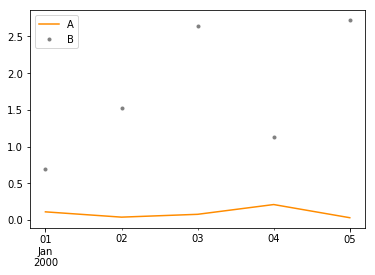

In [112]:
def ChartCumPerf(x, logy=False, **kwargs):
    # kwargs: plot() arguments such as color, etc
    np.cumprod(1 + x).plot(logy=logy, **kwargs)
ChartCumPerf(pd.DataFrame(np.random.randn(5,2), columns=['A', 'B'], 
                          index=pd.date_range('2000-01-01', periods=5)), 
             color = ['darkorange', 'grey'], style = ['-', '.'])    

In [8]:
# R identical()
a = pd.DataFrame(np.nan, columns = ['a','b'], index = pd.Series([0, 1, 2]))
b = pd.DataFrame(np.nan, columns = ['a','b'], index = pd.Series([0, 1, 2]))
a.equals(b)

True

In [ ]:
# find cols in df which have ts ending before specified cutoff date
early_end = tt.apply(lambda x: x.last_valid_index()) < '2008-02-05'
tt.iloc[:, early_end.values] # must use .values subset using boolean vector # subset using booleans

In [271]:
# roll mean
x = pd.DataFrame(np.arange(40).reshape(20, 2), index = pd.period_range('1-1-2000', '20-1-2000', freq = 'D'), columns = ['A', 'B'])
#headtail(x)
#print(x)
#x[]
x.iloc[[5, 6, 12, 13, 19], :] = np.nan
print(x)
print(x.rolling(3, min_periods = 1).sum())

               A     B
2000-01-01   0.0   1.0
2000-01-02   2.0   3.0
2000-01-03   4.0   5.0
2000-01-04   6.0   7.0
2000-01-05   8.0   9.0
2000-01-06   NaN   NaN
2000-01-07   NaN   NaN
2000-01-08  14.0  15.0
2000-01-09  16.0  17.0
2000-01-10  18.0  19.0
2000-01-11  20.0  21.0
2000-01-12  22.0  23.0
2000-01-13   NaN   NaN
2000-01-14   NaN   NaN
2000-01-15  28.0  29.0
2000-01-16  30.0  31.0
2000-01-17  32.0  33.0
2000-01-18  34.0  35.0
2000-01-19  36.0  37.0
2000-01-20   NaN   NaN
                A      B
2000-01-01    0.0    1.0
2000-01-02    2.0    4.0
2000-01-03    6.0    9.0
2000-01-04   12.0   15.0
2000-01-05   18.0   21.0
2000-01-06   14.0   16.0
2000-01-07    8.0    9.0
2000-01-08   14.0   15.0
2000-01-09   30.0   32.0
2000-01-10   48.0   51.0
2000-01-11   54.0   57.0
2000-01-12   60.0   63.0
2000-01-13   42.0   44.0
2000-01-14   22.0   23.0
2000-01-15   28.0   29.0
2000-01-16   58.0   60.0
2000-01-17   90.0   93.0
2000-01-18   96.0   99.0
2000-01-19  102.0  105.0
2000-01-20   70.0

In [278]:
x = pd.DataFrame(np.arange(40).reshape(20, 2), index = pd.period_range('1-1-2000', '20-1-2000', freq = 'D'), columns = ['A', 'B'])
#headtail(x)
#print(x)
#x[]
x.iloc[:10, 1] = np.nan
x.iloc[-3:, 1] = np.nan
print(x)
print(x.rolling(5, min_periods = 2).sum())
# OK, the fct (sum here) is applied to each col separetely

             A     B
2000-01-01   0   NaN
2000-01-02   2   NaN
2000-01-03   4   NaN
2000-01-04   6   NaN
2000-01-05   8   NaN
2000-01-06  10   NaN
2000-01-07  12   NaN
2000-01-08  14   NaN
2000-01-09  16   NaN
2000-01-10  18   NaN
2000-01-11  20  21.0
2000-01-12  22  23.0
2000-01-13  24  25.0
2000-01-14  26  27.0
2000-01-15  28  29.0
2000-01-16  30  31.0
2000-01-17  32  33.0
2000-01-18  34   NaN
2000-01-19  36   NaN
2000-01-20  38   NaN
                A      B
2000-01-01    NaN    NaN
2000-01-02    2.0    NaN
2000-01-03    6.0    NaN
2000-01-04   12.0    NaN
2000-01-05   20.0    NaN
2000-01-06   30.0    NaN
2000-01-07   40.0    NaN
2000-01-08   50.0    NaN
2000-01-09   60.0    NaN
2000-01-10   70.0    NaN
2000-01-11   80.0    NaN
2000-01-12   90.0   44.0
2000-01-13  100.0   69.0
2000-01-14  110.0   96.0
2000-01-15  120.0  125.0
2000-01-16  130.0  135.0
2000-01-17  140.0  145.0
2000-01-18  150.0  120.0
2000-01-19  160.0   93.0
2000-01-20  170.0   64.0


In [99]:
# any, all, !()
pd.Series([True, True, False, True]).any()

True

In [102]:
pd.Series([True, True, False, True]).all()

True

In [101]:
~pd.Series([True, True, False, True]).any() # R: t(), Python: ~()

False

In [184]:
a = 'b'
print(a)
if (a != 'a'): # not equal like in R !+
    print('a is a')

b
a is a


In [ ]:
# subsetting by date for rows and indices for cols # xts['2007-02-01':'2008-01-31', 1:3]
print(d_tmp['2008-01-21':'2008-01-31'].iloc[:, 0:3].head(3))
print(d_tmp.loc['2008-01-21':'2008-01-31', d_tmp.columns[0:3]].head(3))

In [144]:
a = 10
b = int(a / 2) 
isinstance(b, (int)) # check if is integer

True

In [301]:
start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.0


In [ ]:
# apply row wise avearge, e.g. to create an equally weighted index
tr_er_d_ew = tr_er_d.apply(func='mean', axis = 1)

In [ ]:
# https://flare9xblog.com/category/python/
# Calculate Maximum Draw Down
lookback = 252
rolling_max = df['Close'].rolling(lookback, min_periods=1).max()
daily_drawdown = df['Close']/rolling_max - 1
daily_drawdown.plot()
plt.ylabel('Draw Down %')
plt.title('252 Day Rolling Draw Down')
plt.legend(loc='upper left')
plt.show()

In [136]:
# correlation tests: spearman (rank) and pearsons have different arguments
from scipy import stats
my_xts = pd.DataFrame(np.random.randn(5,3), columns=list('ABC'), index=pd.date_range('2000-01-01', periods=5))
print(my_xts)
print('spearman')
print(stats.spearmanr(my_xts[['A', 'B']]))
print('pearson')
print(stats.pearsonr(my_xts.A, my_xts.B))# requires x and y

                   A         B         C
2000-01-01 -0.640861 -1.489230  2.586798
2000-01-02 -1.541091 -1.283555  1.247662
2000-01-03  0.494716 -0.284213 -1.739344
2000-01-04  0.840635 -0.914228  0.944971
2000-01-05  0.879500 -0.615003 -0.669928
spearman
SpearmanrResult(correlation=0.6, pvalue=0.28475697986529375)
pearson
(0.7294138291655407, 0.1619303256161906)


In [ ]:
# mgcv in Python 
# https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f

In [ ]:
# intersection between two data.frames
# https://stackoverflow.com/questions/26921943/pandas-intersection-of-two-data-frames-based-on-column-entries/26921975
s1 = pd.merge(dfA, dfB, how='inner', on=['S', 'T']) # assume both dfA and dfB have both cols S and T
# otherwise use left_on and right_on instead`

In [8]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           1.90e-08
Time:                        11:26:00   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [18]:
# glmnet
# todo check using https://glmnet-python.readthedocs.io/en/latest/glmnet_vignette.html
results_elnet = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit_regularized(alpha = 0.5)
# TODO find out how to get results
print(results_elnet.params)
print(results_elnet.summary())

Intercept          59.821129
Literacy           -0.457429
np.log(Pop1831)     0.139864
dtype: float64
None


In [12]:
dir(results_elnet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data_attr',
 'fittedvalues',
 'initialize',
 'k_constant',
 'model',
 'params',
 'predict',
 'summary']

In [ ]:
# to keep df_f index
# a.reset_index().merge(b, how="left").set_index('index')
# https://stackoverflow.com/questions/11976503/how-to-keep-index-when-using-pandas-merge

In [4]:
# get sp constituents
# https://medium.com/python-data/how-to-scrape-information-of-s-p-500-listed-companies-with-python-8205f895ee7a
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [9]:
type(data)

list

In [14]:
# type of each list elment
[type(item) for item in data]

[pandas.core.frame.DataFrame, pandas.core.frame.DataFrame]

In [15]:
[item.shape for item in data]

[(506, 9), (211, 6)]

In [8]:
table = data[0]
table.head() # problem, header is first row

,0,1,2,3,4,5,6,7,8
0,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
1,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740,1902
2,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
3,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
4,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981


In [17]:
data[1].head() # table with recent changes

,0,1,2,3,4,5
0,Date,Added,Removed,Reason,NaN,NaN
1,Ticker,Security,Ticker,Security,NaN,NaN
2,"February 27, 2019",WAB,Wabtec Corporation,GT,The Goodyear Tire & Rubber Company,WAB acquiring GE transportation business[7]
3,"February 15, 2019",ATO,Atmos Energy Corp,NFX,Newfield Exploration,ECA acquiring NFX[8]
4,"January 18, 2019",TFX,Teleflex Inc,PCG,PG&E Corp,PCG filing for bankruptcy[9]


In [20]:
table_head = table.iloc[0]
table_head

0                 Security
1                   Symbol
2              SEC filings
3              GICS Sector
4        GICS Sub Industry
5    Headquarters Location
6         Date first added
7                      CIK
8                  Founded
Name: 0, dtype: object

In [26]:
table = table.iloc[1:].copy()
table.rename(columns=table_head, inplace=True)

In [27]:
print(table.head(3))
print(table.tail(3))

        Security Symbol SEC filings             GICS Sector  \
3    AbbVie Inc.   ABBV     reports             Health Care   
4    ABIOMED Inc   ABMD     reports             Health Care   
5  Accenture plc    ACN     reports  Information Technology   

                GICS Sub Industry    Headquarters Location Date first added  \
3                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
4           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
5  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

          CIK      Founded  
3  0001551152  2013 (1888)  
4  0000815094         1981  
5  0001467373         1989  
                   Security Symbol SEC filings  GICS Sector  \
503  Zimmer Biomet Holdings    ZBH     reports  Health Care   
504           Zions Bancorp   ZION     reports   Financials   
505                  Zoetis    ZTS     reports  Health Care   

         GICS Sub Industry     Headquarters Location Date fir

In [31]:
table.columns

Index(['Security', 'Symbol', 'SEC filings', 'GICS Sector', 'GICS Sub Industry',
       'Headquarters Location', 'Date first added', 'CIK', 'Founded'],
      dtype='object')

In [33]:
table.shape

(503, 9)

In [36]:
ticker_list = table.Symbol
ticker_list.head()

3    ABBV
4    ABMD
5     ACN
6    ATVI
7    ADBE
Name: Symbol, dtype: object

# Misc helper functions

In [1]:
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [2]:
# similar to R PerformanceAnalytics table.AnnualizedReturns(R, scale = NA, Rf = 0, geometric = TRUE, digits = 4)

# we assume all returns are excess of cash (Sharpe Ratio)
periods_pa = 4 # quarterly, 12 monthly
if x.isnull().any().any():
    print('the following columns contain NAs')
    print(x.columns[x.isnull().any()])
    print('NAs will be removed in each column')
# https://stackoverflow.com/questions/20708455/different-results-for-standard-deviation-using-numpy-and-r
if geom:
    print('geometric chaining is used to aggregate returns')
    # remove NAs in len(x.dropna()), since np.prod() does deal with NA (removes), but not len    
    ret_pa = x.apply(lambda x: np.prod(1 + x.dropna())**(periods_pa/len(x.dropna())) - 1, axis = 0)
    sd_pa = x.apply(lambda x: np.std(x.dropna(), ddof = 1) * np.sqrt(periods_pa))
if not geom:
    print('arithmetic chaining is used to aggregate returns')
    # remove NAs in len(x.dropna()), since np.prod() does deal with NA (removes), but not len    
    ret_pa = x.apply(lambda x: x.dropna().mean() * periods_pa, axis = 0)
    sd_pa = x.apply(lambda x: np.std(x.dropna(), ddof = 1) * np.sqrt(periods_pa))

retval = pd.DataFrame(np.array([ret_pa, sd_pa, ret_pa / sd_pa]),
                      columns = x.columns,
                      index = ['Return annualized', 'Std Dev annualized', 'Sharpe ratio annualized'])

In [ ]:
def ffill2lastobs(x):   
    # one liner removes the last row, if all are NAs
    # https://stackoverflow.com/questions/36388419/forward-fill-all-except-last-value-in-python-pandas-dataframe
    # return(x.apply(lambda x: x.loc[:x.last_valid_index()].fillna(method='ffill')))
    for i in x.columns:
        x.loc[:x.loc[:, i].last_valid_index(), i] = x.loc[:x.loc[:, i].last_valid_index(), i].fillna(method='ffill')        
    return x

In [ ]:
def ChartCumPerf(x, logy=False, **kwargs):
    np.cumprod(1 + x).plot(logy=logy, title = 'Cumulative Return', **kwargs)

In [ ]:
def to_clipboard_full(x):
    pd.set_option('display.max_rows', len(x))
    x.to_clipboard(sep = ',')
    pd.reset_option('display.max_rows')

In [3]:
from rpy2.robjects.packages import importr

ModuleNotFoundError: No module named 'rpy2'